In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import RepeatedStratifiedKFold

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder,QuantileTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/d4mlp/BankChurners.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# 15% data in Eduction Level  and 7% of Marital Status Columns have Empty records


In [ ]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

**Inferences from Data**
1. CLIENTNUM looks like an ID Field with no statistical significance
2. Mean Customer_Age is 46 Years, with 25th percentile at 41 Years to 75th percentile at 52 years, while the max age is 73
3. Mean Dependent_count is 2, with 25th percentile at 1 and 75th percentile at 3, while max is 5
4. Mean Months_on_book is 35, with 25th percentile at 31 and 75th percentile at 40, while max is 56
5. Mean Total_Relationship_Count count is 3.8, with 25th percentile at 3 and 75th percentile at 5, while max is 6
6. Mean Months_Inactive_12_mon count is 2.3, with 25th percentile at 2 and 75th percentile at 3, while max is 6
7. Mean Contacts_Count_12_mon count is 2.5, with 25th percentile at 2 and 75th percentile at 3, while max is 6
8. Mean Credit_Limit count is 8.6K, with 25th percentile at 2.5K and 75th percentile at 11K, while max is 34.5K, and has a good number of outliers
9. Mean Total_Revolving_Bal count is 1.2K, with 25th percentile at 359 and 75th percentile at 1.8K, while max is 2.5K
10.Mean Avg_Open_To_Buy count is 7.5K, with 25th percentile at 1.3K and 75th percentile at 9.9K, while max is 34.5K
11.Mean Total_Amt_Chng_Q4_Q1 count is 0.76, with 25th percentile at 0.63 and 75th percentile at 0.85, while max is 3.4
12.Mean Total_Trans_Amt count is 4.4K, with 25th percentile at 2.2K and 75th percentile at 4.74K, while max is 18.5K
13.Mean Total_Trans_Ct count is 64, with 25th percentile at 45 and 75th percentile at 81, while max is 185K
14.Mean Total_Ct_Chng_Q4_Q1 count is 0.7, with 25th percentile at 0.58 and 75th percentile at 0.82, while max is 3.7
15.Mean Avg_Utilization_Ratio count is 0.27, with 25th percentile at 0.23 and 75th percentile at 0.5, while max is 0.99 



In [ ]:
objCols = df.describe(include='object').columns
for objCol in objCols:
  # The Category Column is already label encoded
  print('*'*10 + objCol + '*'*10 )
  print(df[objCol].value_counts())
  print('*'*30)

**********Attrition_Flag**********
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
******************************
**********Gender**********
F    5358
M    4769
Name: Gender, dtype: int64
******************************
**********Education_Level**********
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
******************************
**********Marital_Status**********
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
******************************
**********Income_Category**********
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
******************************
**********Card_Category**********
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_C

In [ ]:
## Lets Plot the numeric Data types
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

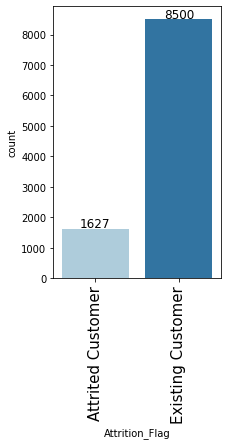

In [ ]:
labeled_barplot(df,'Attrition_Flag')

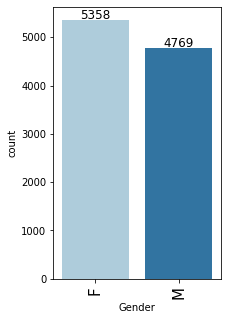

In [ ]:
labeled_barplot(df,'Gender')

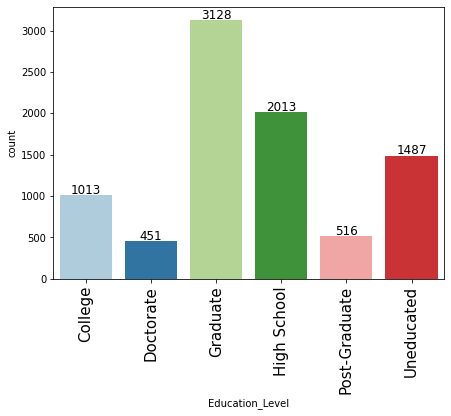

In [ ]:
labeled_barplot(df,'Education_Level')

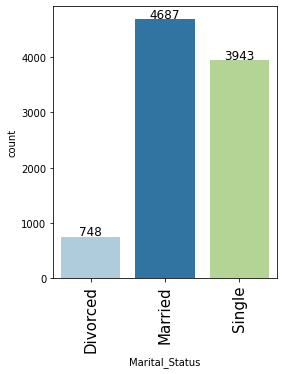

In [ ]:
labeled_barplot(df,'Marital_Status')

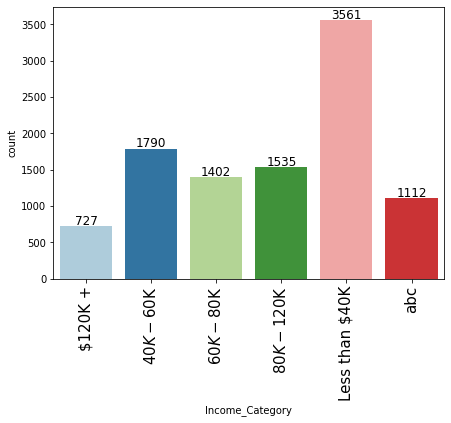

In [ ]:
labeled_barplot(df,'Income_Category')

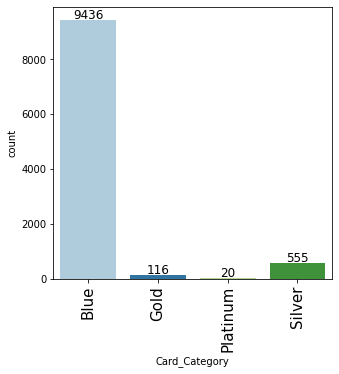

In [ ]:
labeled_barplot(df,'Card_Category')

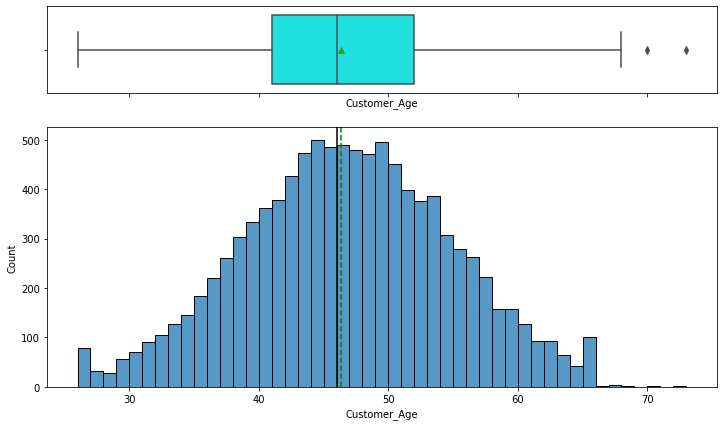

In [ ]:
histogram_boxplot(df,'Customer_Age')

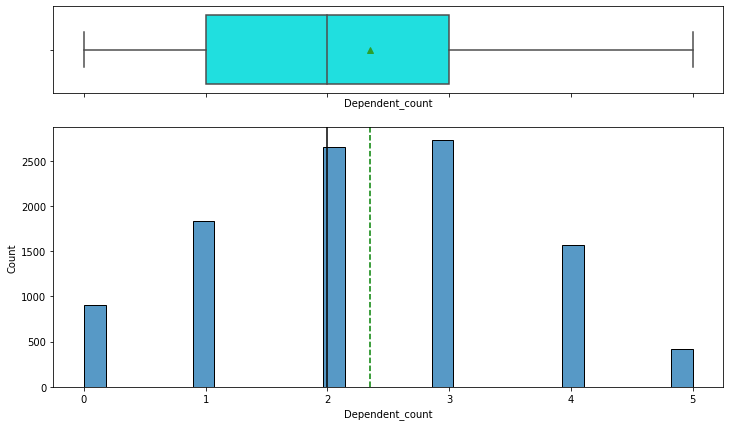

In [ ]:
histogram_boxplot(df,'Dependent_count')

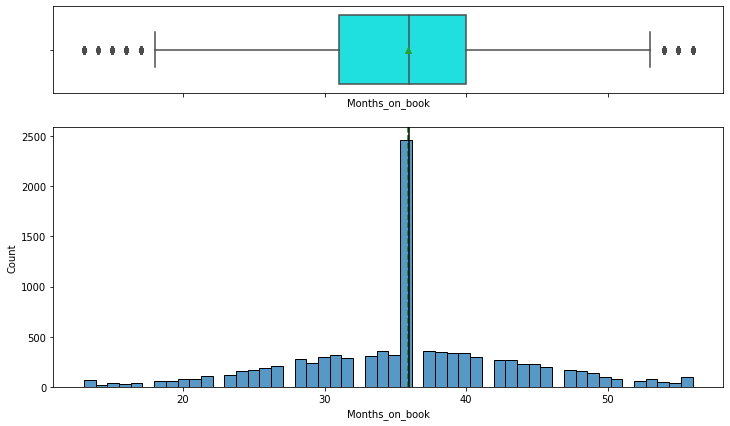

In [ ]:
histogram_boxplot(df,'Months_on_book')

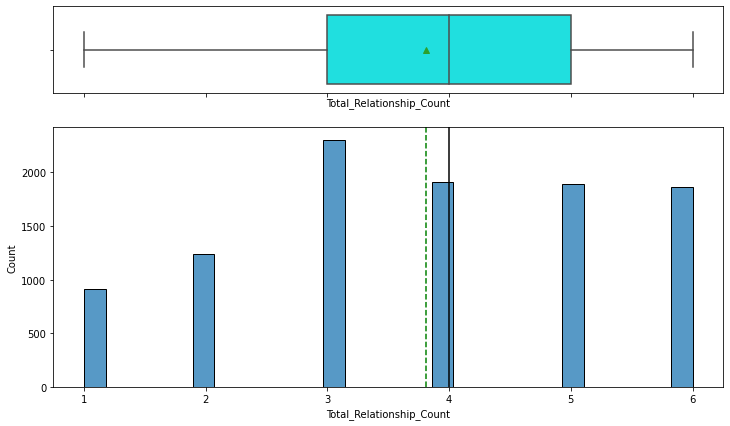

In [ ]:
histogram_boxplot(df,'Total_Relationship_Count')

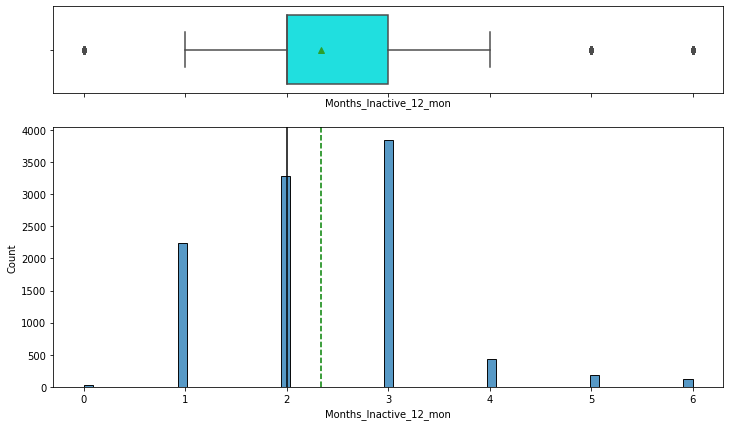

In [ ]:
histogram_boxplot(df,'Months_Inactive_12_mon')

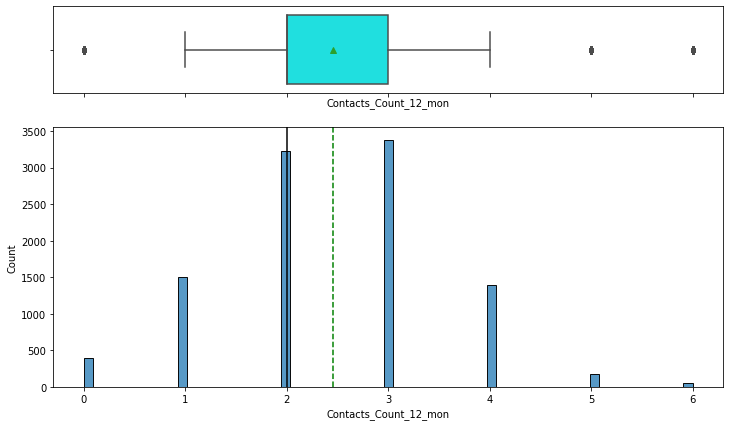

In [ ]:
histogram_boxplot(df,'Contacts_Count_12_mon')

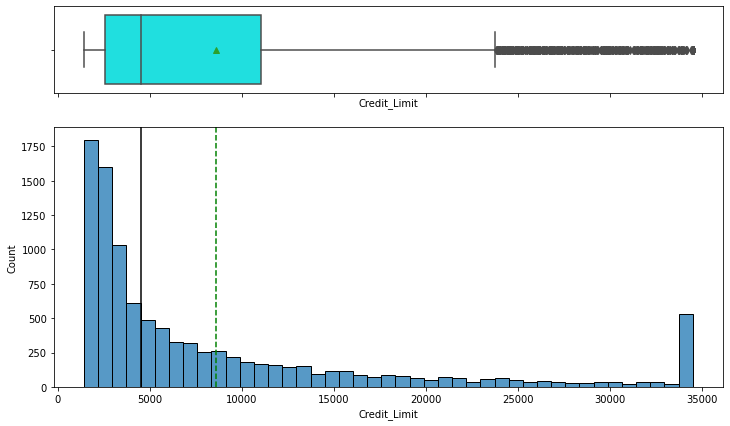

In [ ]:
histogram_boxplot(df,'Credit_Limit')

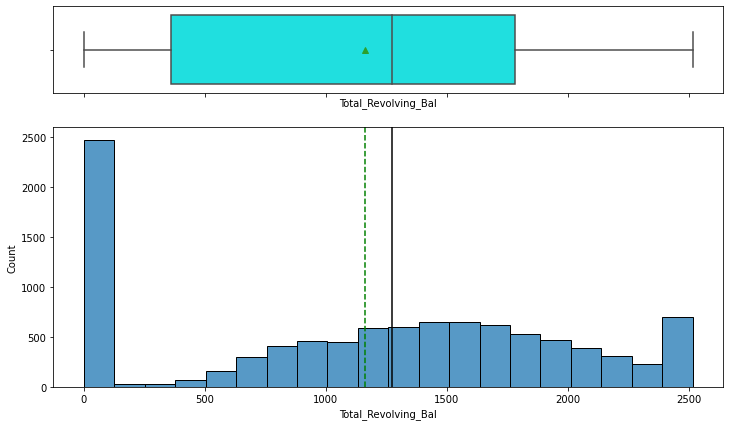

In [ ]:
histogram_boxplot(df,'Total_Revolving_Bal')

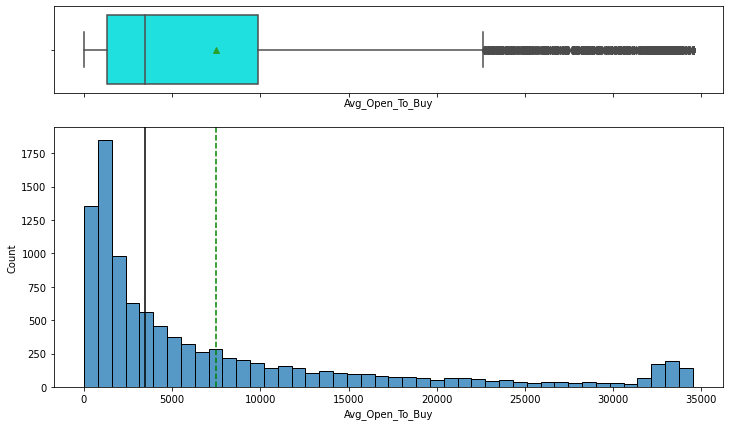

In [ ]:
histogram_boxplot(df,'Avg_Open_To_Buy')

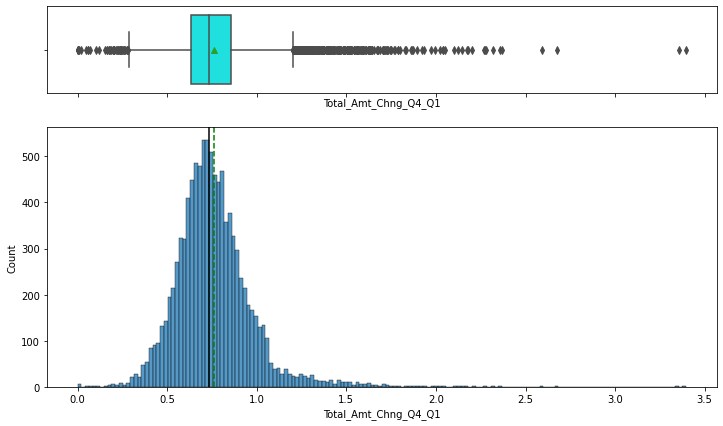

In [ ]:
histogram_boxplot(df,'Total_Amt_Chng_Q4_Q1')

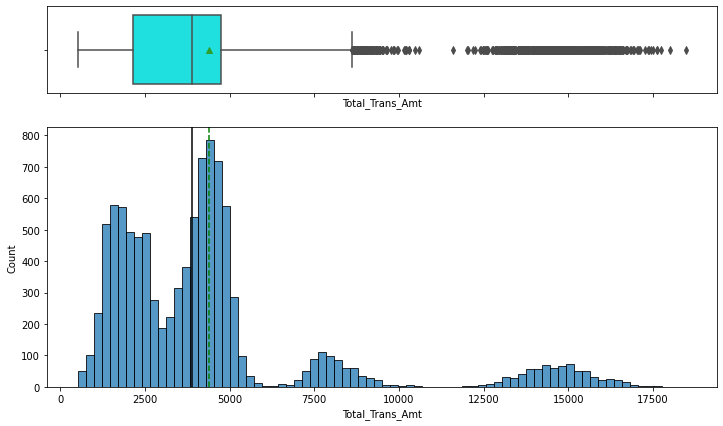

In [ ]:
histogram_boxplot(df,'Total_Trans_Amt')

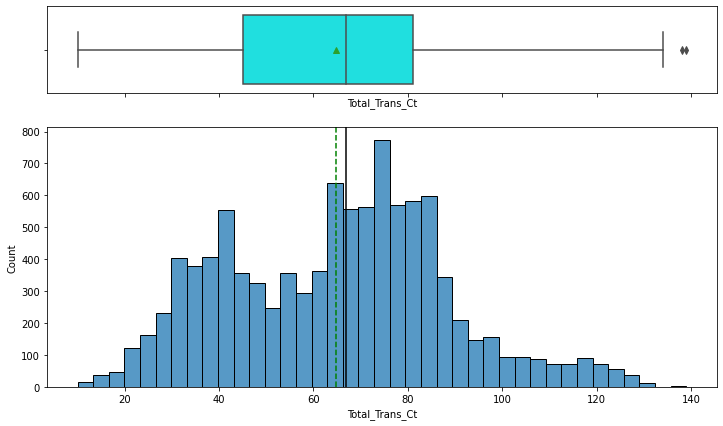

In [ ]:
histogram_boxplot(df,'Total_Trans_Ct')

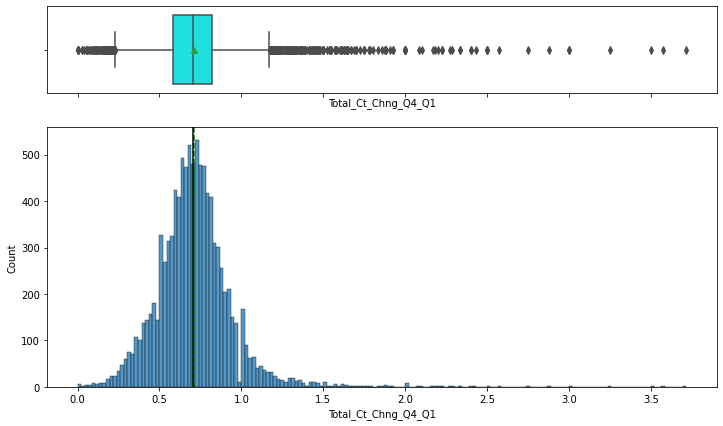

In [ ]:
histogram_boxplot(df,'Total_Ct_Chng_Q4_Q1')

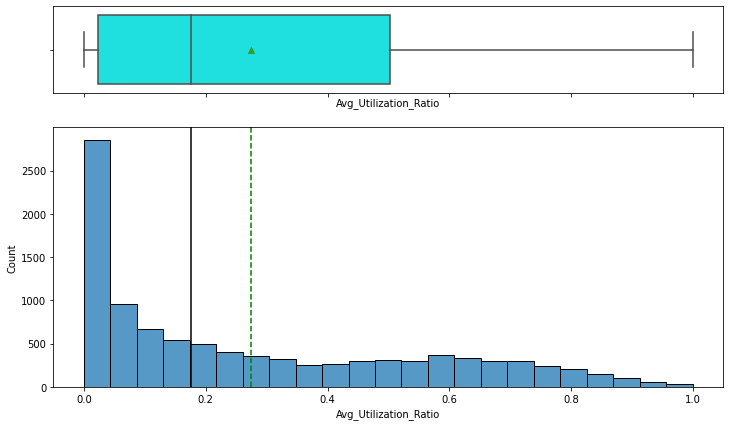

In [ ]:
histogram_boxplot(df,'Avg_Utilization_Ratio')

**Inferences from Univariate Analysis**
1. Attrited Customer Information is showing a huge imbalance and we have scope to do Up Sampling of this data
2. Gender Information is almost divided 53-47 between Male vs Female
3. Graduates make up 37% of available Education Levels, wile High Schoolers make up 25%, followed by UnEducated and College goers.
4. Most of the Customers show Marital Status as Married followed by Single
5. Most of the People make less than $40K, and the next big salary earners fall in the 40K-60K bucket
6. Blue Card Holders make up 90% of the Card holder population
7. Customer Age is having few outliers outside the whiskers of the box plot and could be either pruned or it could be re-based to the 3rd Quantile
8. Dependent Count shows a normal distribution with no outliers
9. Months on Book shows a normal distribution with a few outliers on either side of the Whiskers of the Box Plot
10.Total Relationship count does not have any outliers outside the box plot
11.Months_Inactive_12_mon shows outliers on either side of the box plot and could be normalised
12.Contacts_Count_12_mon shows outliers on either side of the box plot and could be normalised
13.Credit_Limit has numerous outliers outside the 3rd Quantile Range and is left skewed, this data could be transformed
14.Total_Revolving_Bal follows a normal distribution
15.Avg_Open_To_Buy shows up lot of outliers outside the whiskers of 3rd Quantile Range
16.Total_Amt_Chng_Q4_Q1 follows a normal distribution but has data points outside of the 1st and 3rd quantile ranges outside the whiskers of box plot
17.Total_Trans_Amt shows numerous outliers outside of the box plot
18.Total_Trans_Ct shows a few outliers outside the box plot
19.Total_Ct_Chng_Q4_Q1 shows quite a lot of outliers outside of the box plot
20.Avg_Utilization_Ratio does not have any outliers outside of box plot and seems to be skewed to the lower side


**Bi-Variate Analysis**

In [ ]:
## Lets start by bringing up some of the re-usable visualisation methods, starting with Stacked Bar Plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


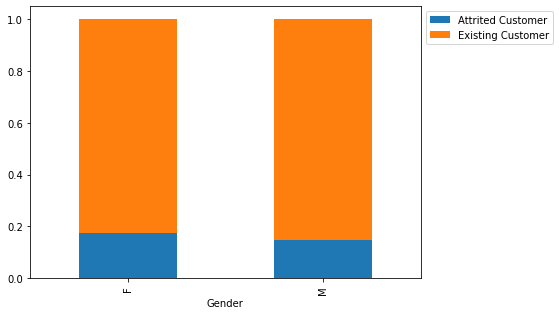

In [ ]:
stacked_barplot(df,'Gender','Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


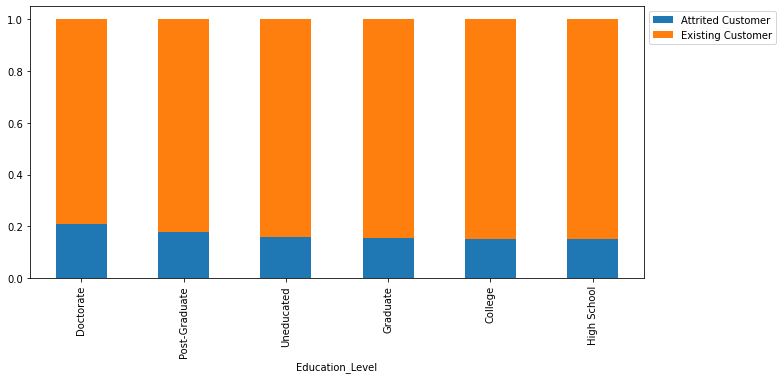

In [ ]:
stacked_barplot(df,'Education_Level','Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


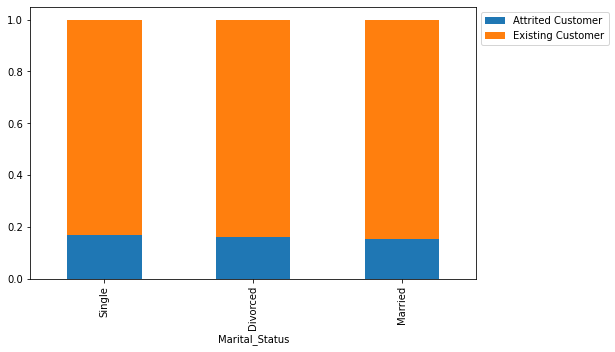

In [ ]:
stacked_barplot(df,'Marital_Status','Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


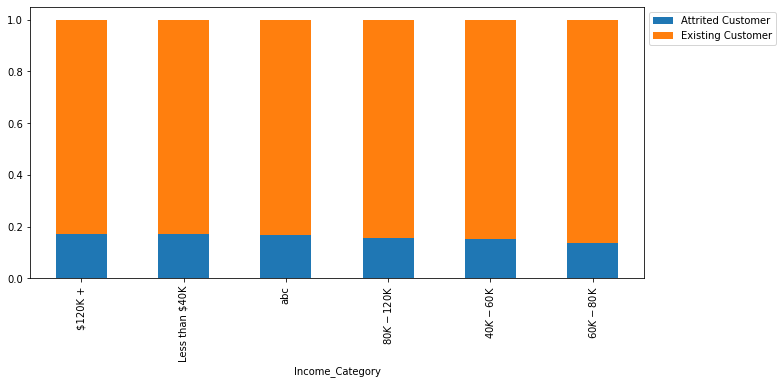

In [ ]:
stacked_barplot(df,'Income_Category','Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


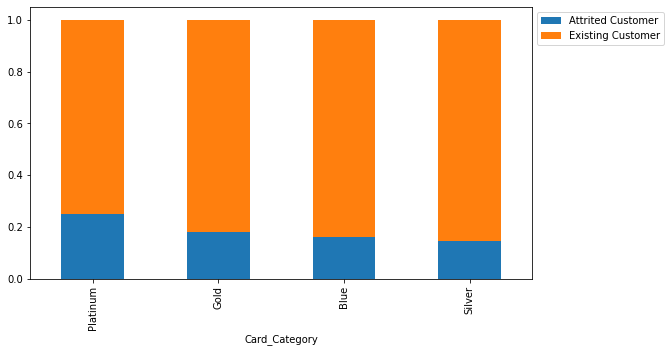

In [ ]:
stacked_barplot(df,'Card_Category','Attrition_Flag')

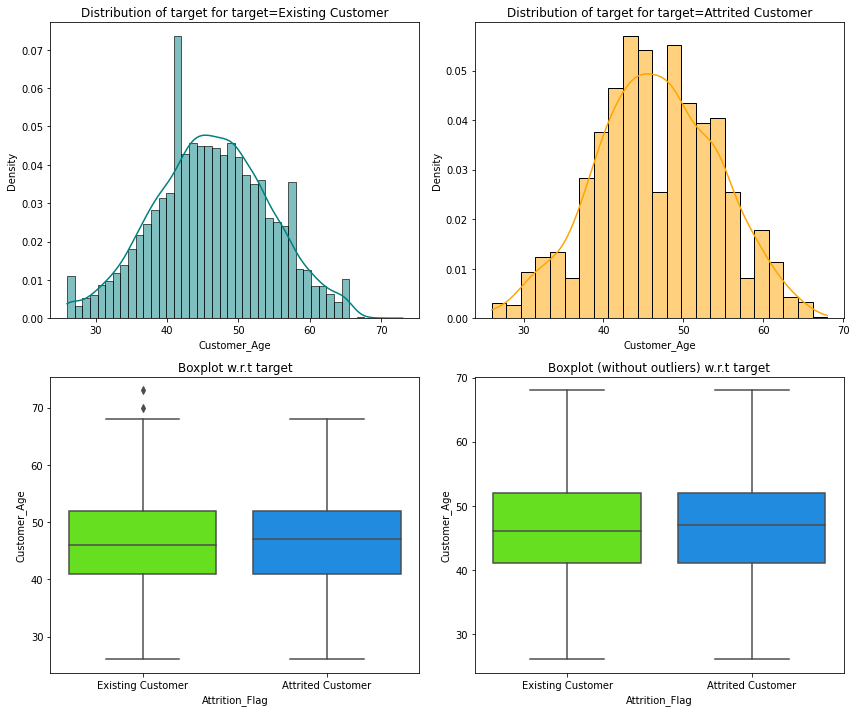

In [ ]:
distribution_plot_wrt_target(df,'Customer_Age','Attrition_Flag')

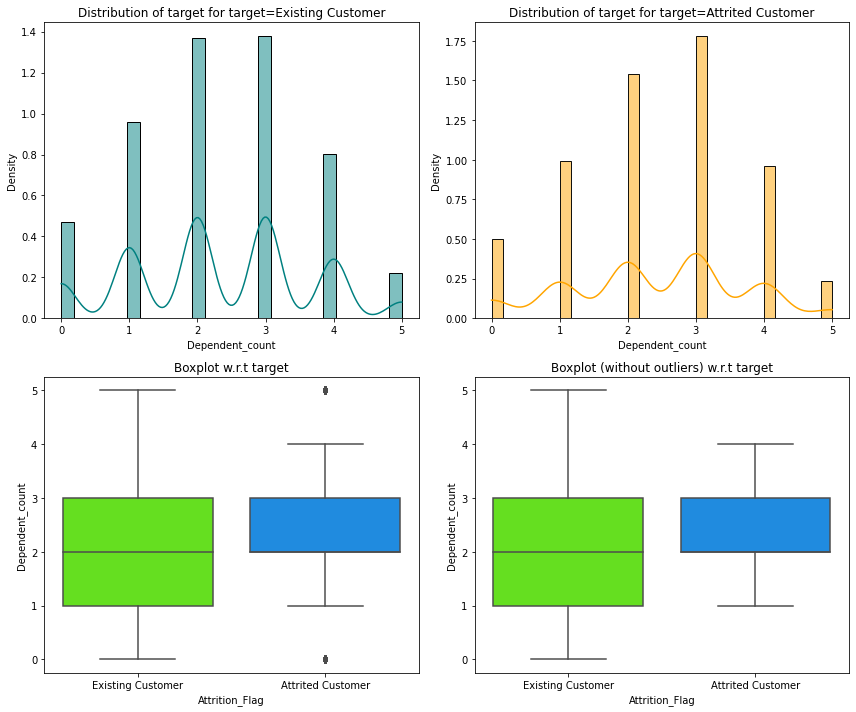

In [ ]:
distribution_plot_wrt_target(df,'Dependent_count','Attrition_Flag')

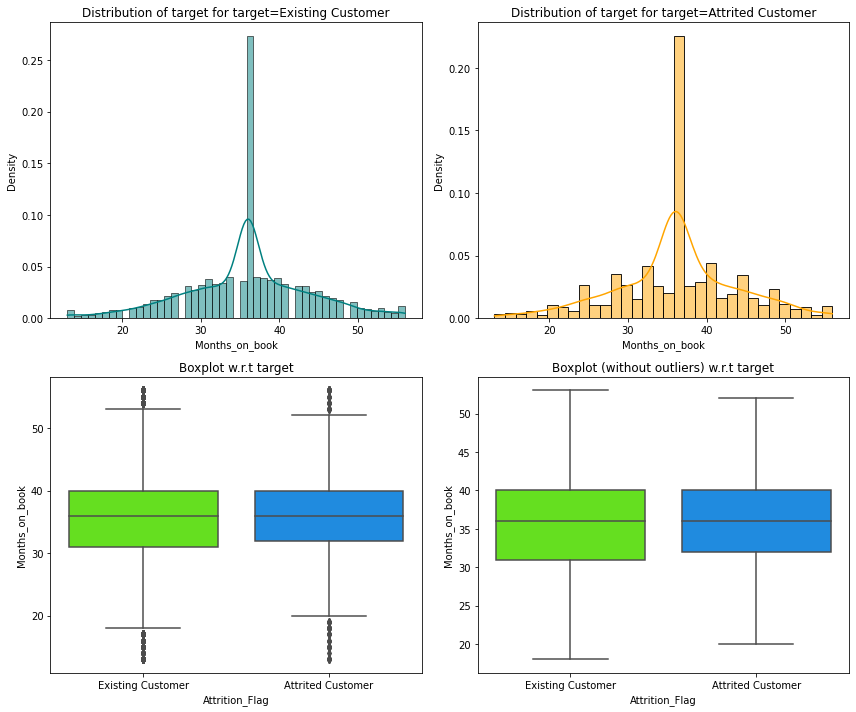

In [ ]:
distribution_plot_wrt_target(df,'Months_on_book','Attrition_Flag')

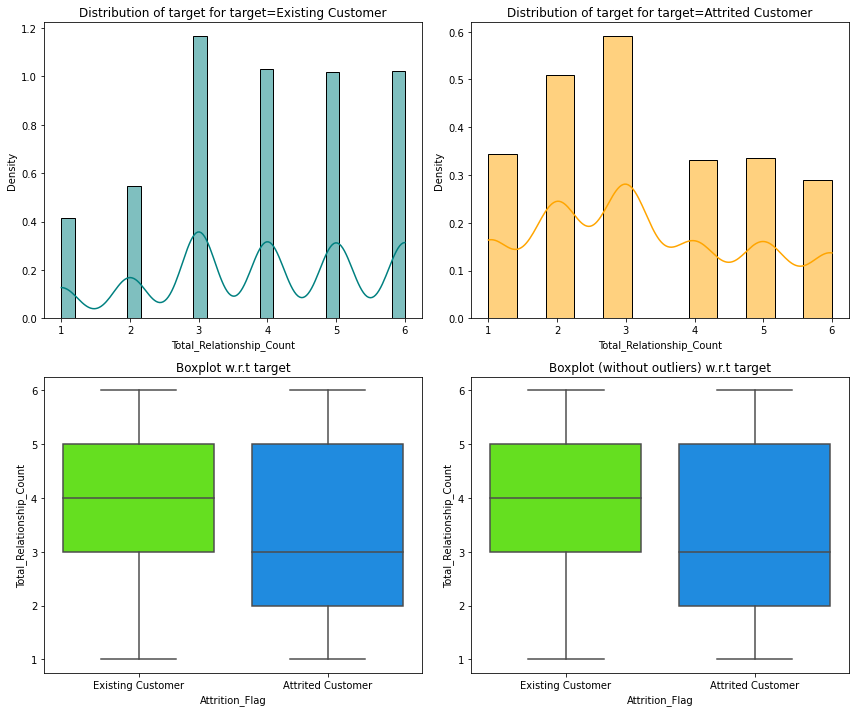

In [ ]:
distribution_plot_wrt_target(df,'Total_Relationship_Count','Attrition_Flag')

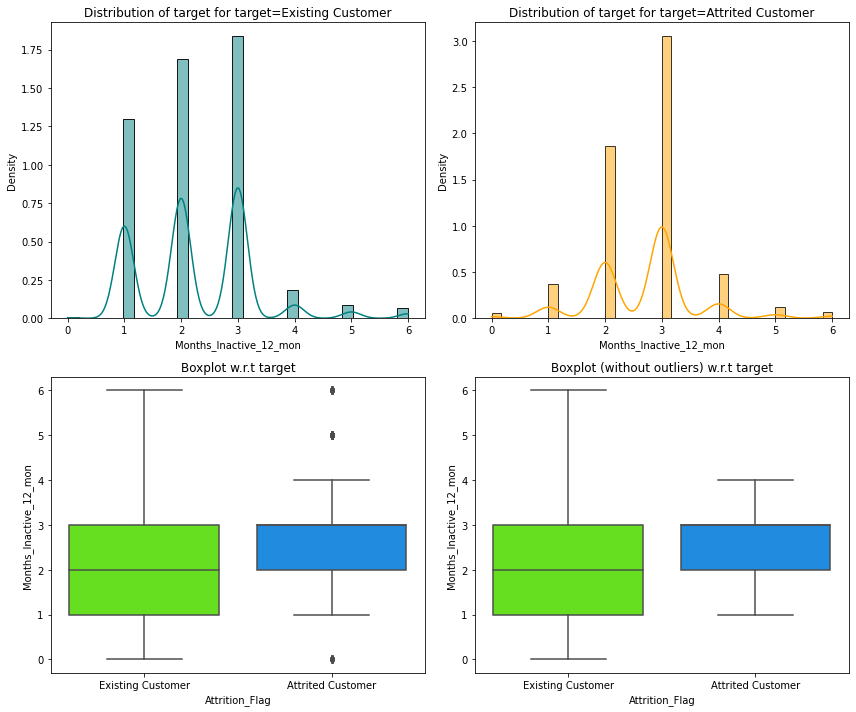

In [ ]:
distribution_plot_wrt_target(df,'Months_Inactive_12_mon','Attrition_Flag')

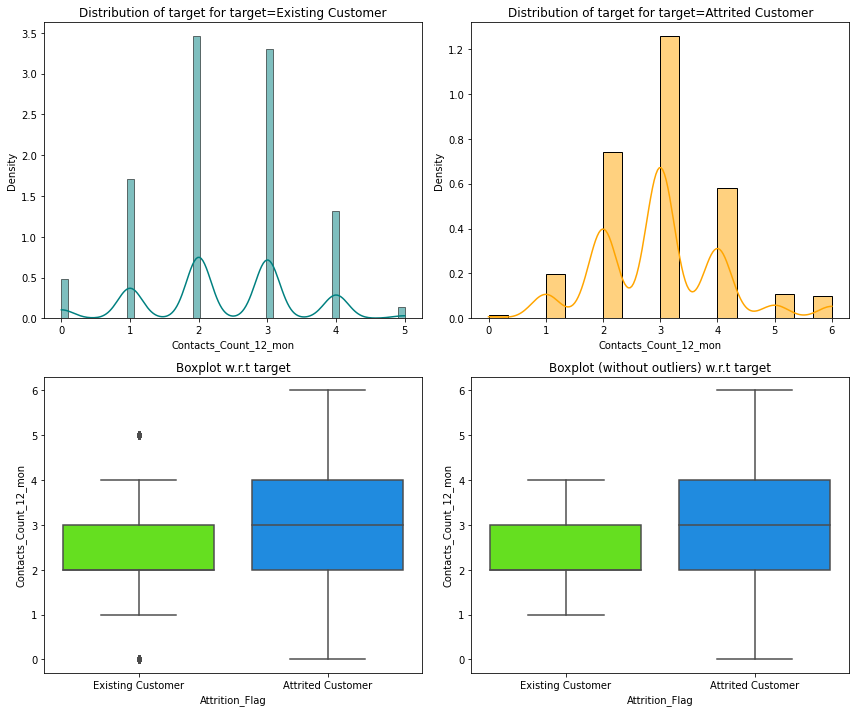

In [ ]:
distribution_plot_wrt_target(df,'Contacts_Count_12_mon','Attrition_Flag')

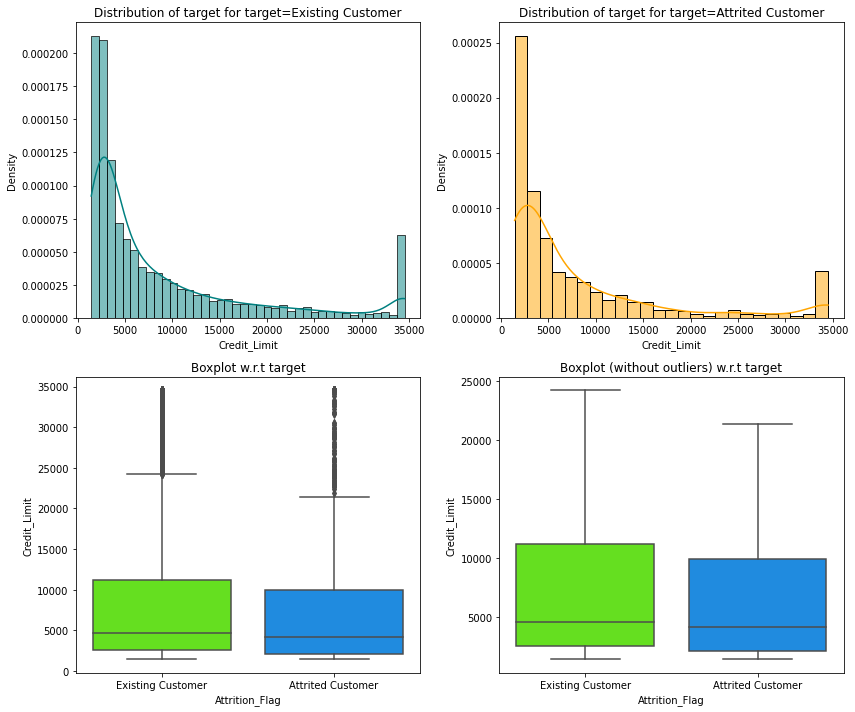

In [ ]:
distribution_plot_wrt_target(df,'Credit_Limit','Attrition_Flag')

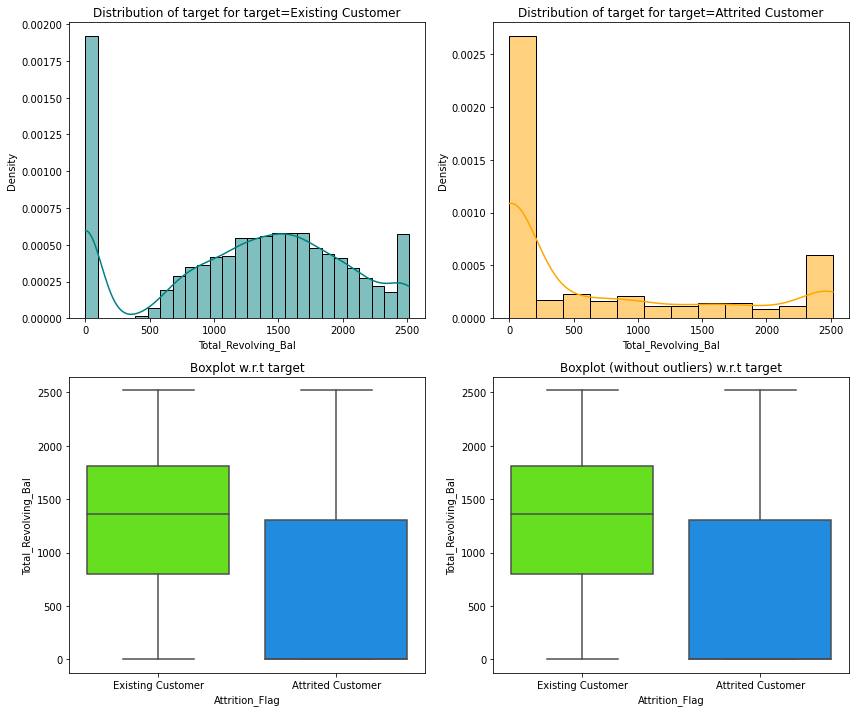

In [ ]:
distribution_plot_wrt_target(df,'Total_Revolving_Bal','Attrition_Flag')

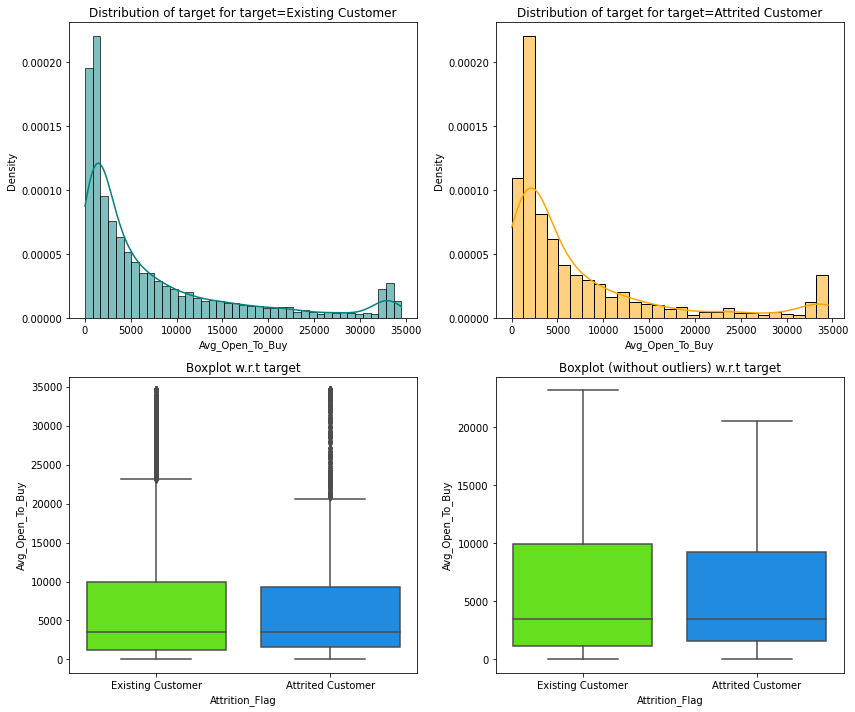

In [ ]:
distribution_plot_wrt_target(df,'Avg_Open_To_Buy','Attrition_Flag')

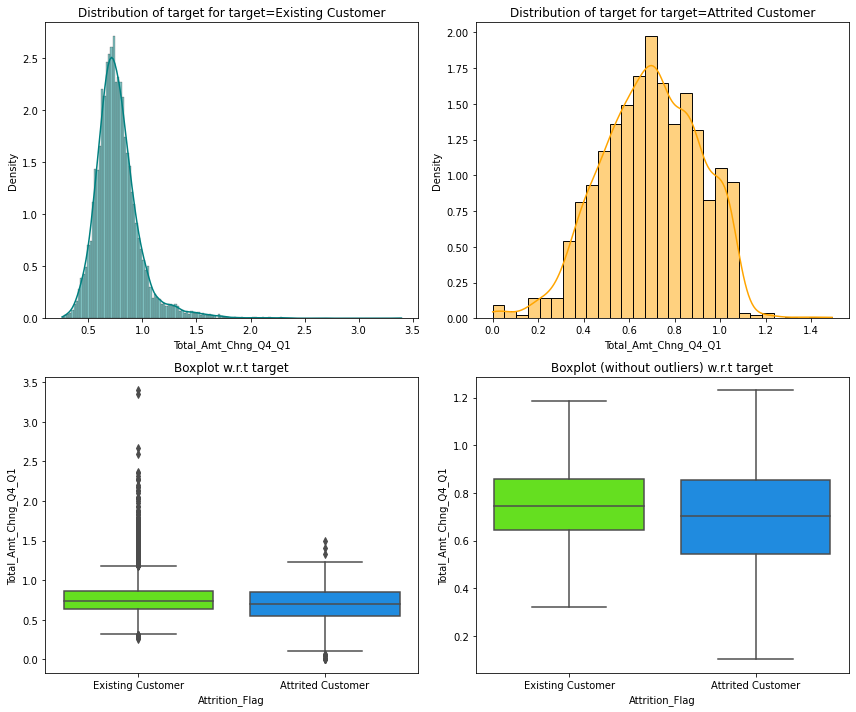

In [ ]:
distribution_plot_wrt_target(df,'Total_Amt_Chng_Q4_Q1','Attrition_Flag')

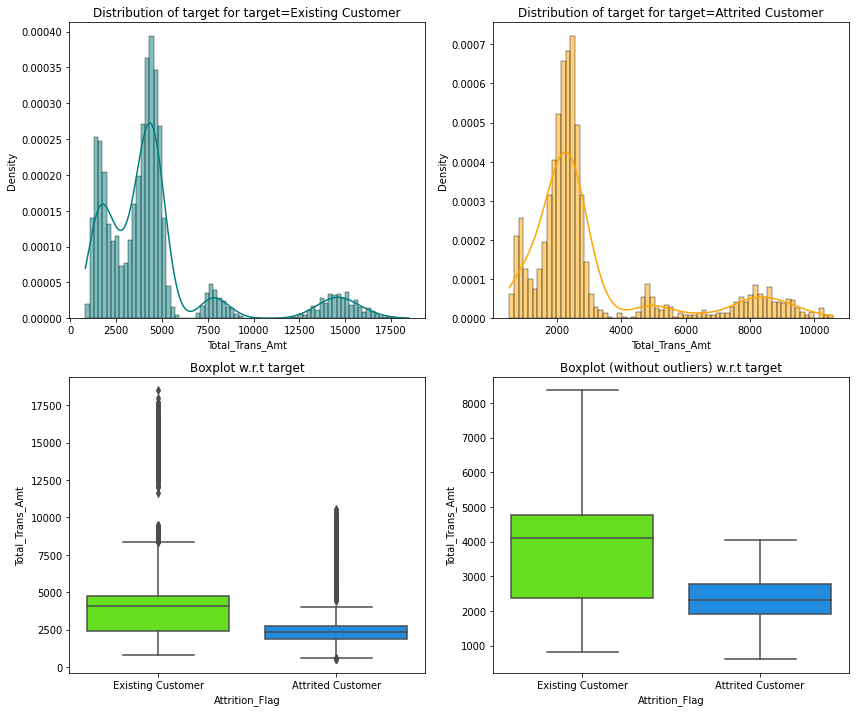

In [ ]:
distribution_plot_wrt_target(df,'Total_Trans_Amt','Attrition_Flag')

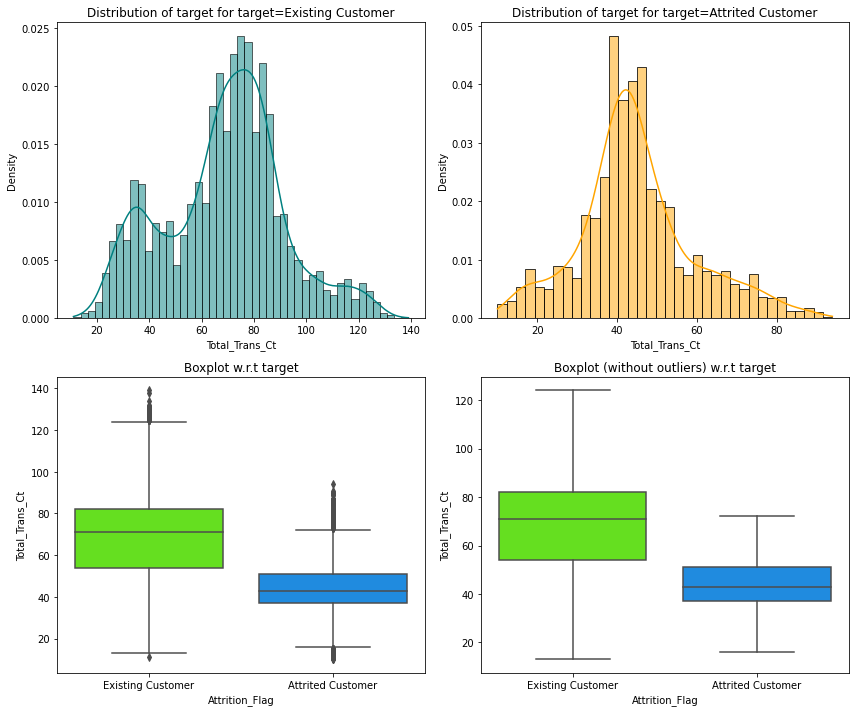

In [ ]:
distribution_plot_wrt_target(df,'Total_Trans_Ct','Attrition_Flag')

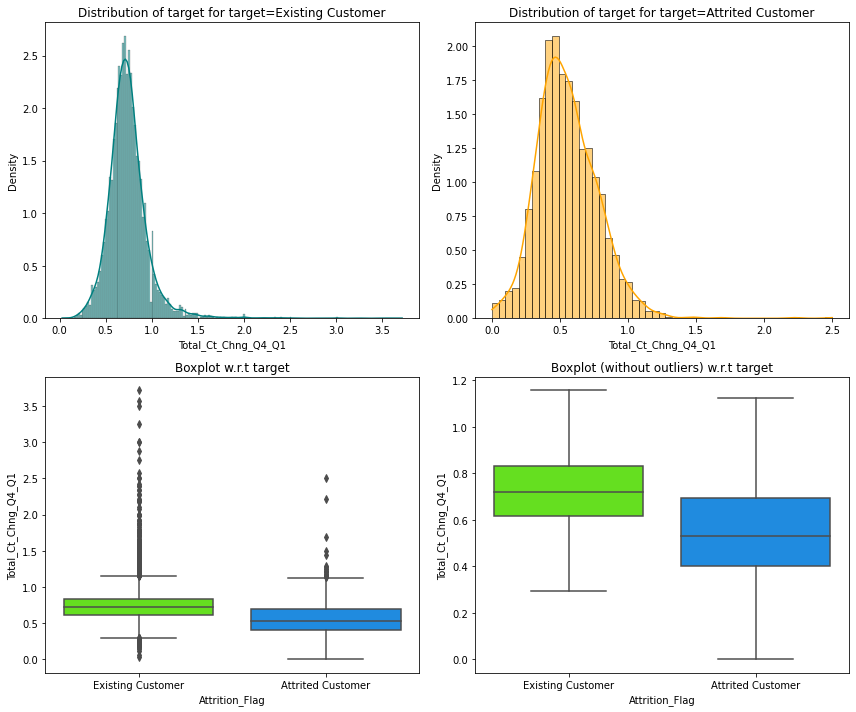

In [ ]:
distribution_plot_wrt_target(df,'Total_Ct_Chng_Q4_Q1','Attrition_Flag')

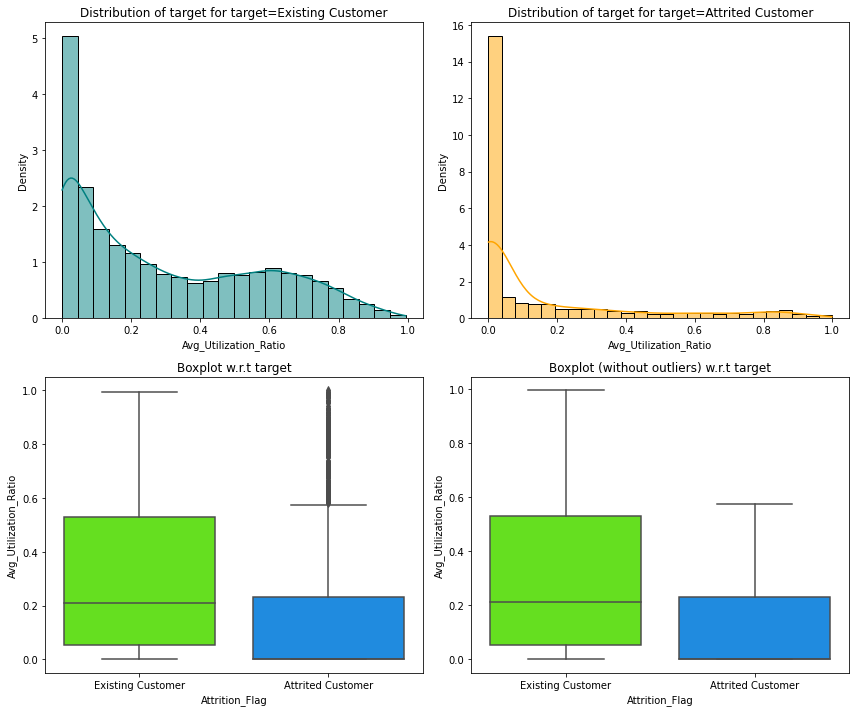

In [ ]:
distribution_plot_wrt_target(df,'Avg_Utilization_Ratio','Attrition_Flag')

**Inferences from Bivariate Analysis**

1. Gender has a equal proportion of attrited custoemrs within the Male and Female customers
2. Education level has almost 20% of the customers as attrite customers across all levels
3. The Attrition Flag is 20% across all Marital Status customers as well
4. Income Category 60K - 80K has the lowest Attrition, while it is almost 20% amongst the rest of the Income Categories
5. Card_Category Platinum shows maximum attrition while Blue Card_Category shows the least attrition
6. The Attrited Customers show a normal distribution with Age, similar to existing Customers with maximum customers within 40-50 years
7. Dependent_Count vs Attrited Customers does not show any significant differences in relation
8. Months_on_book vs Attrited Customers does not show any significant differences in relation
9. Months_Inactive_12_mon vs Attrited Customers does not show any significant differences in relation
10.Contacts_Count_12_mon vs Attrited Customers does not show any significant differences in relation
11.Credit_Limit vs Attrited Customers does not show any significant differences in relation 
12.Customers with Zero to 500 Total_Revolving_Bal seems to show a greater chance of Attrition than rest
13.Avg_Open_To_Buy vs Attrited Customers does not show any significant differences in relation 
14.Total_Amt_Chng_Q4_Q1 between 0.6 to 0.8 show greater chance of attrition than the ones within Existing Customers who have a smaller 1Q-3Q Quantile Ranges/Box Plot
15.Customers with Total_Trans_Amt between 0 to 3000 show a greater tendency to Attrite
16.Customers with Total_Trans_Ct between 30 to 50 show a greater tendency to attrite
17.Customers with Total_Ct_Chng_Q4_Q1 between 0.4 to 0.8 show a greater tendency to attrite
18.Customers with Avg_Utilization_Ratio less than 20% shows a greater tendency to attrite


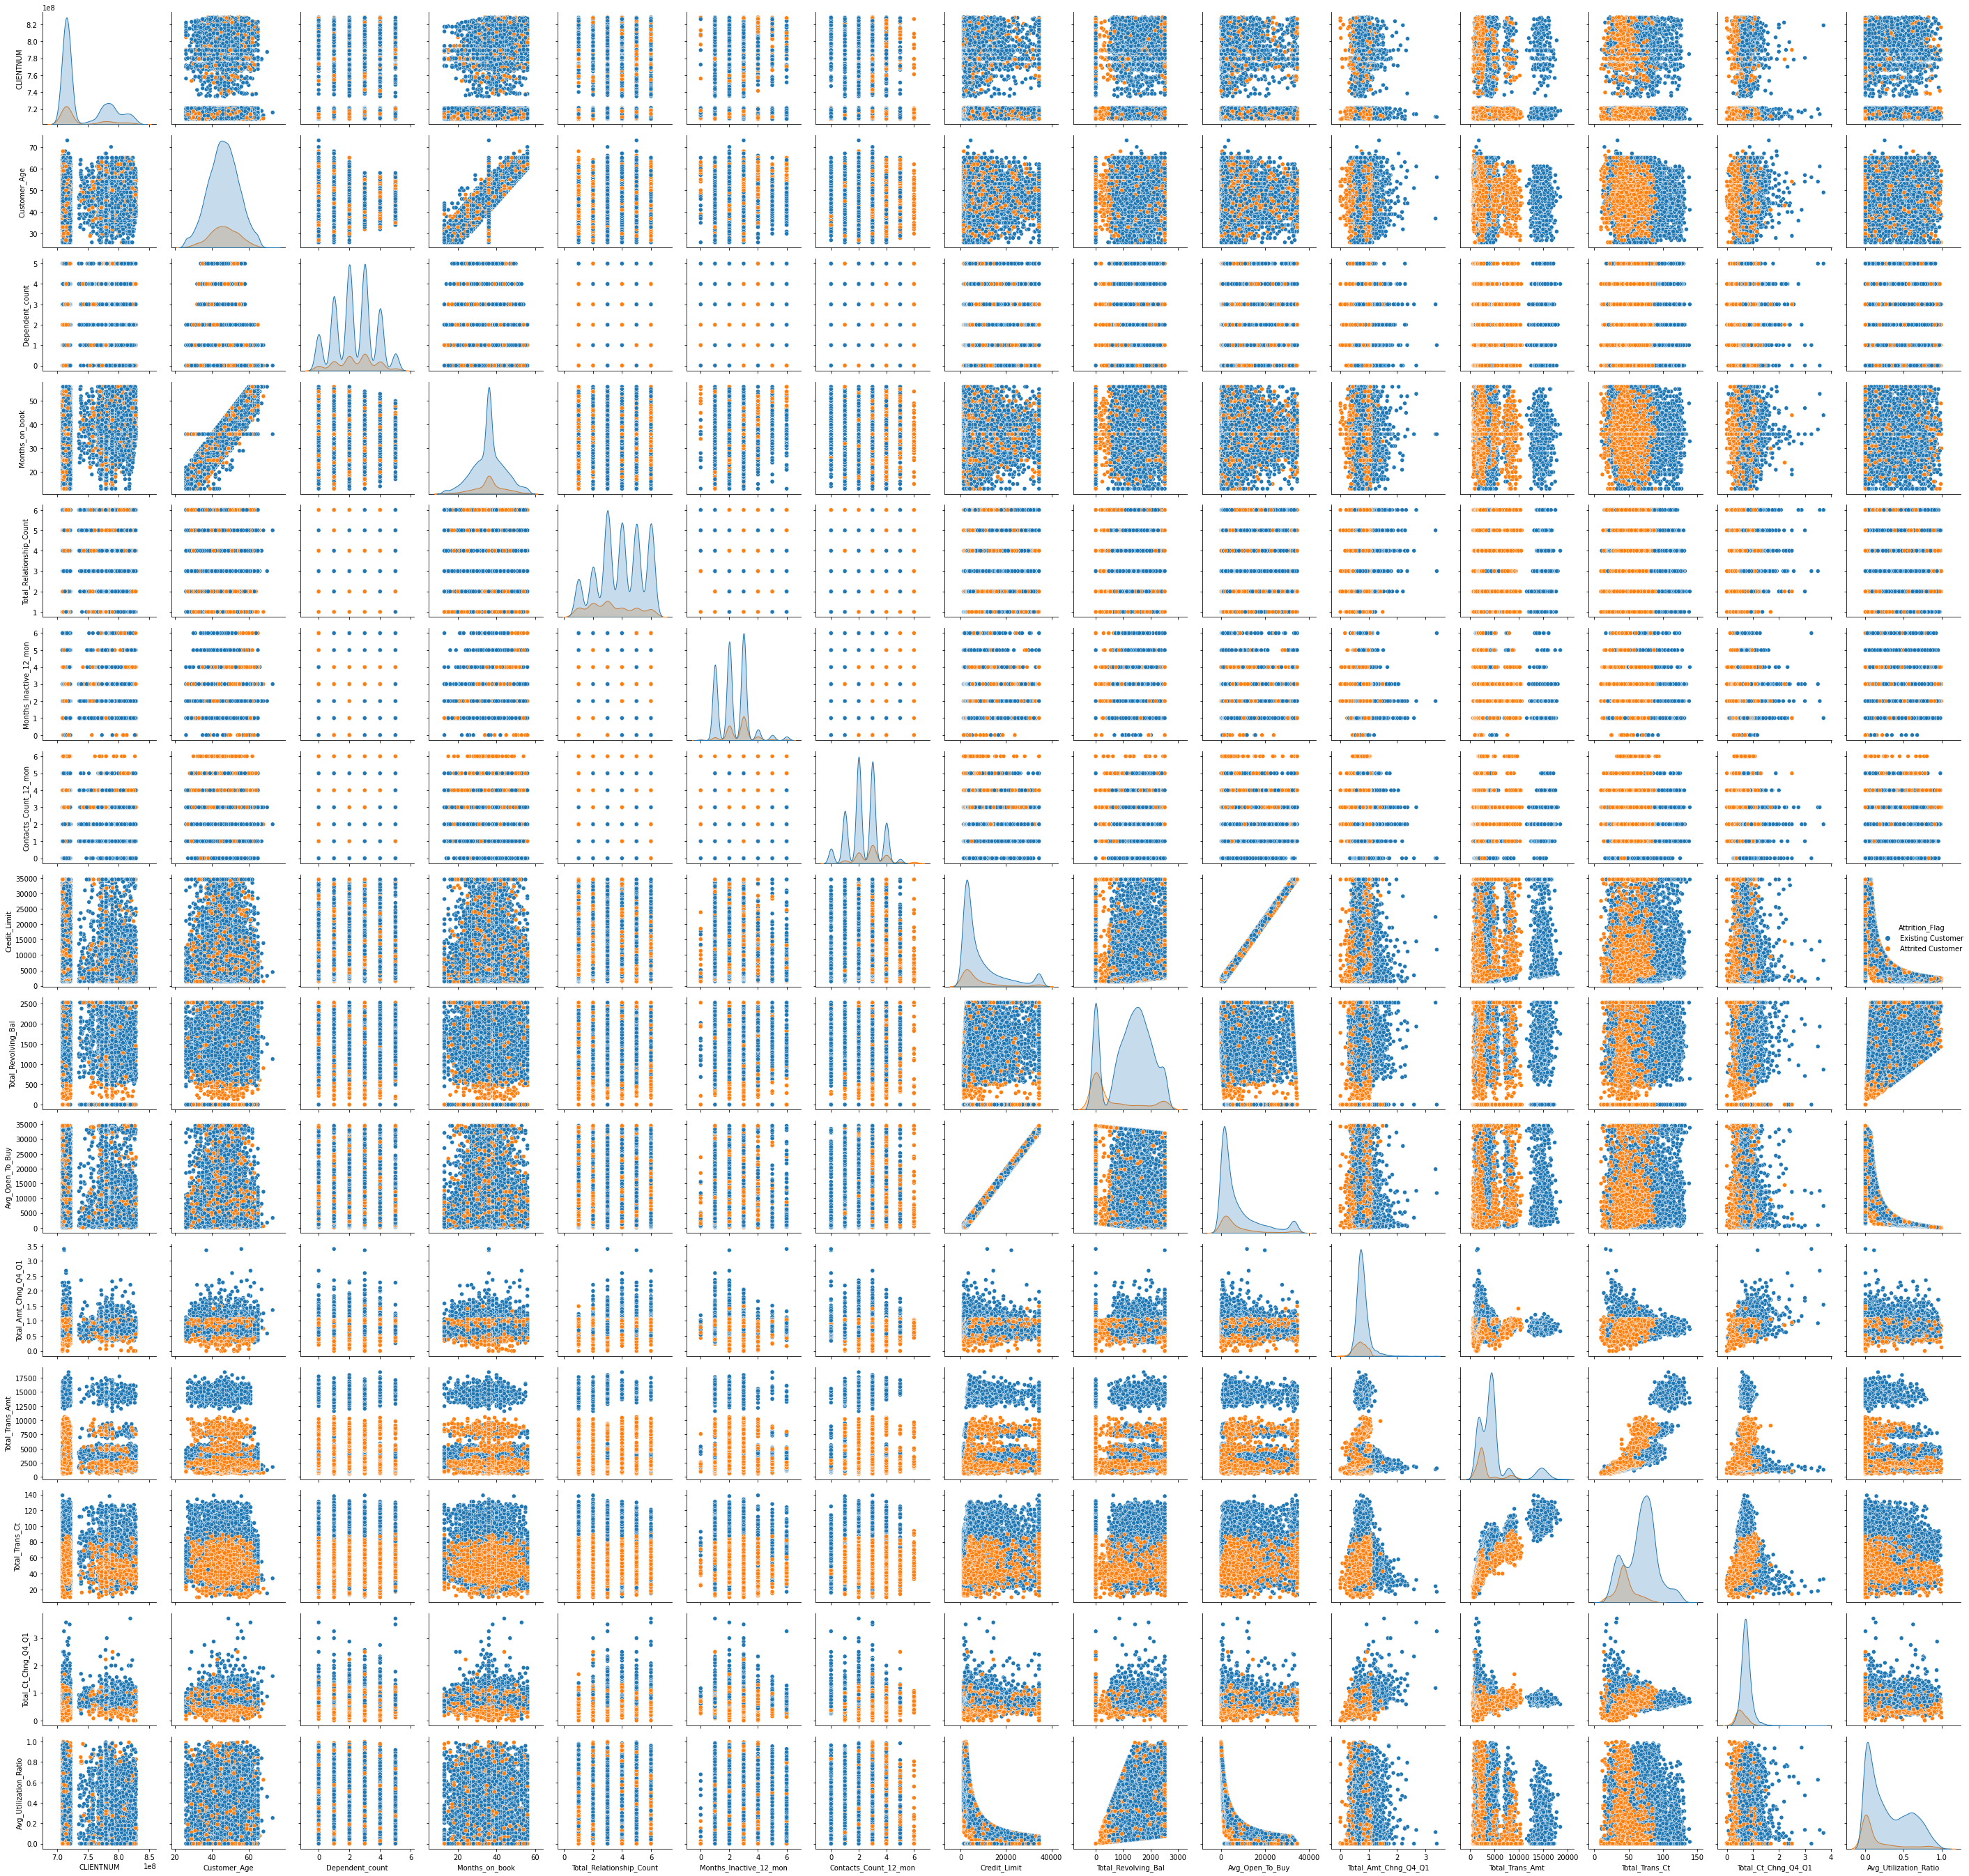

In [ ]:
sns.pairplot(data=df,hue='Attrition_Flag')
plt.tight_layout()
plt.show()


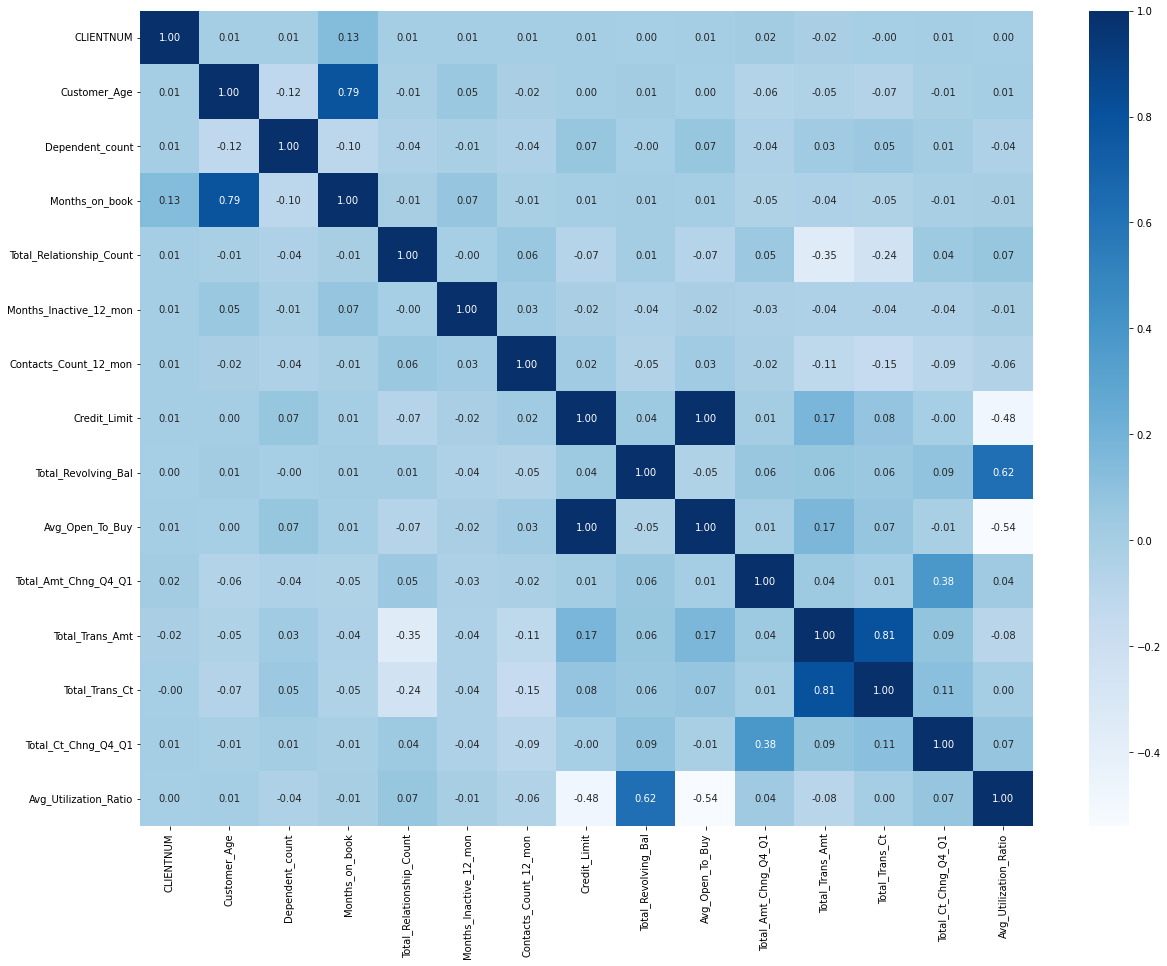

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Blues')

**Missing Data Processing**

In [ ]:
# Looking at the data only 2 columns are having missing data, they are Education_Level and Marital_Status

# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Income_Category",
    "Marital_Status",    
]

In [ ]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
# Lets Take a back up of df to use it for Pipeline Building
# We see Credit_Limit is very highly co-related with Avg_Open_To_Buy and one of the columns could be dropped
df.drop(columns='Avg_Open_To_Buy',axis=1,inplace=True)
data = df.copy()

In [ ]:
gender = {'M':0,'F':1}
df["Gender"] = df["Gender"].map(gender)

education = {'Graduate':0,'High School':1,'Uneducated':2,'College':3,'Post-Graduate':4,'Doctorate':5}
df["Education_Level"] = df["Education_Level"].map(education)

marital = {'Married':0,'Single':1,'Divorced':2}
df["Marital_Status"] = df["Marital_Status"].map(marital)

incCat = {'Less than $40K':0,'$40K - $60K':1,'$80K - $120K':2,'$60K - $80K':3,'abc':4,'$120K +':5}
df["Income_Category"] = df["Income_Category"].map(incCat)

ccat = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}
df["Card_Category"] = df["Card_Category"].map(ccat)



In [ ]:
# There is no Income Category as abc, and we need to treat this as missing value
df["Income_Category"] = df["Income_Category"].apply(lambda x : np.nan if x == 4 else x)

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

scalerCols = ['Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt']

quantile = df.copy()
quantile[scalerCols] = scaler.fit_transform(quantile[scalerCols])

In [ ]:
# Lets Prepare the Data for Modelling
X = quantile.drop(["CLIENTNUM","Attrition_Flag"], axis=1)
y = quantile["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [ ]:
imputer = KNNImputer(n_neighbors=4)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [ ]:
X_train.Education_Level.value_counts()

0.000    1854
1.000    1228
2.000     881
3.000     618
4.000     312
5.000     254
Name: Education_Level, dtype: int64

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.fit_transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
X_train.Education_Level.value_counts()

0.000    1854
1.000    1264
2.000     987
3.000     618
4.000     312
5.000     254
1.500     203
0.500     182
2.750     168
1.750      79
1.250      74
0.250      67
2.250      10
1.430       3
Name: Education_Level, dtype: int64

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender, "Gender")
inverse_mapping(education, "Education_Level")
inverse_mapping(marital, "Marital_Status")
inverse_mapping(incCat, "Income_Category")
inverse_mapping(ccat, "Card_Category")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    print('Before calling Predict')

    y_pred = model.predict(predictors)
    print('After calling Predict')
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
X_train.nunique()

Customer_Age                  44
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                5
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                4211
Total_Revolving_Bal         1764
Total_Amt_Chng_Q4_Q1        1013
Total_Trans_Amt             3777
Total_Trans_Ct               123
Total_Ct_Chng_Q4_Q1          751
Avg_Utilization_Ratio        928
dtype: int64

In [ ]:
X_train['Education_Level'].value_counts()

Graduate         2103
High School      1341
Uneducated       1279
College           786
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2103
High School      1341
Uneducated       1279
College           786
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3043
Single      2575
Divorced     457
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2222
$40K - $60K       1273
$80K - $120K      1192
$60K - $80K        939
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         676
Uneducated       462
High School      436
College          210
Post-Graduate    143
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1037
Single       833
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    749
$40K - $60K       462
$80K - $120K      390
$60K - $80K       289
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


**Logical Regression - BAU**

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

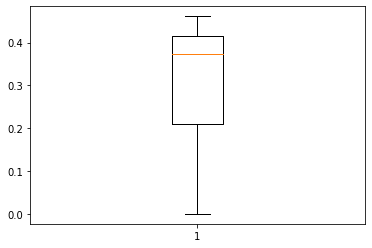

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [ ]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.893   0.463      0.778 0.581

In [ ]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy  Recall  Precision    F1
0     0.897   0.506      0.778 0.613

Before calling Predict
After calling Predict


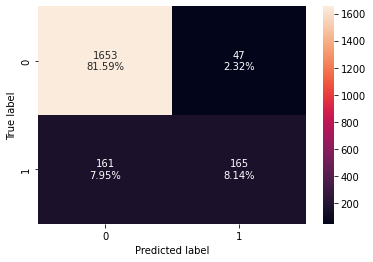

In [ ]:
confusion_matrix_sklearn(lr, X_val, y_val)

**1. Decision Tree Regressor - BAU**

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Calculating different metrics on validation set with decision tree
dec_tree_train_perf = model_performance_classification_sklearn(
    d_tree, X_val, y_val
)
print("decision tree validation performance:")
dec_tree_train_perf

decision tree validation performance:


Accuracy  Recall  Precision    F1
0     0.938   0.810      0.805 0.807

In [ ]:
# Calculating different metrics on test set with decision tree
dec_tree_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("decision tree testing performance:")
dec_tree_test_perf

decision tree testing performance:


Accuracy  Recall  Precision    F1
0     0.932   0.831      0.767 0.798

Before calling Predict
After calling Predict


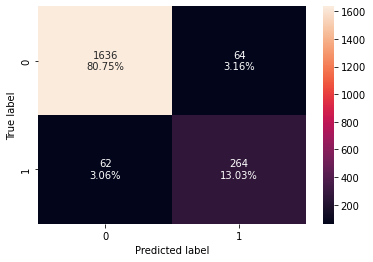

In [ ]:
# Lets Look at Confusion Matrix for validation data with Decision Tree
confusion_matrix_sklearn(d_tree, X_val, y_val)

Before calling Predict
After calling Predict


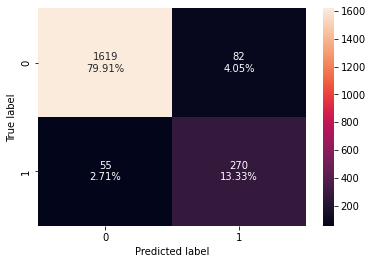

In [ ]:
# Lets Look at Confusion Matrix for test data with Decision Tree
confusion_matrix_sklearn(d_tree, X_test, y_test)

**2. Random Forest - BAU**

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=100)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Calculating different metrics on validation set with random forest
rf_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_val, y_val
)
print("random forest validation performance:")
rf_train_perf

random forest validation performance:


Accuracy  Recall  Precision    F1
0     0.958   0.791      0.935 0.857

In [ ]:
# Calculating different metrics on test set with random forest
rf_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("random forest Testing performance:")
rf_test_perf

random forest Testing performance:


Accuracy  Recall  Precision    F1
0     0.960   0.815      0.923 0.866

Before calling Predict
After calling Predict


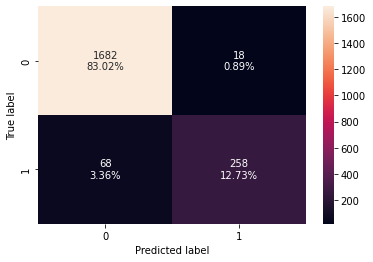

In [ ]:
# Lets Look at Confusion Matrix for validation data with Random Forest
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

Before calling Predict
After calling Predict


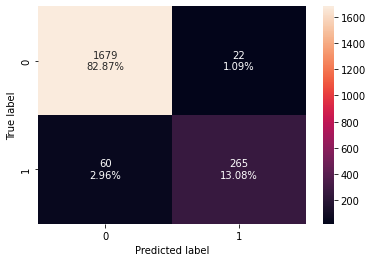

In [ ]:
# Lets Look at Confusion Matrix for Test data with Random Forest, We see that the False Positives have come down significantly with Random Forest
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

**3. Bagging Classifer - BAU** 

In [ ]:
seed = 1
dTreeclass = DecisionTreeClassifier()
num_trees = 100

bagging_classifier = BaggingClassifier(base_estimator=dTreeclass,n_estimators=num_trees, random_state=seed)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
# Calculating different metrics on validation set with bagging classifier
bg_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_val, y_val
)
print("bagging classifier validation performance:")
bg_train_perf

bagging classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.964   0.865      0.907 0.885

In [ ]:
# Calculating different metrics on validation set with bagging classifier
bg_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("bagging classifier test performance:")
bg_test_perf

bagging classifier test performance:


Accuracy  Recall  Precision    F1
0     0.962   0.895      0.874 0.884

Before calling Predict
After calling Predict


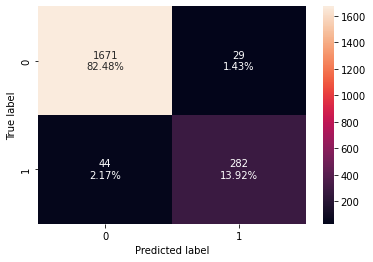

In [ ]:
# Lets Look at Confusion Matrix for validation data with Bagging Classifier
confusion_matrix_sklearn(bagging_classifier, X_val, y_val)

Before calling Predict
After calling Predict


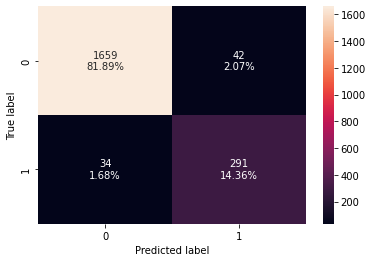

In [ ]:
# Lets Look at Confusion Matrix for test data with Bagging Classifier
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

**4. Adaboost Classifier - BAU**

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
# Calculating different metrics on validation set with ada boost 
ab_train_perf = model_performance_classification_sklearn(
    abc, X_val, y_val
)
print("bagging classifier validation performance:")
ab_train_perf

bagging classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.962   0.862      0.901 0.881

In [ ]:
# Calculating different metrics on validation set with ada boost 
ab_test_perf = model_performance_classification_sklearn(
    abc, X_test, y_test
)
print("bagging classifier test performance:")
ab_test_perf

bagging classifier test performance:


Accuracy  Recall  Precision    F1
0     0.966   0.895      0.895 0.895

Before calling Predict
After calling Predict


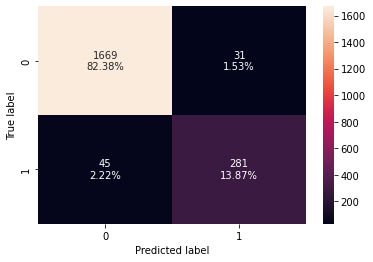

In [ ]:
# Lets Look at Confusion Matrix for validation data with Adaboost Classifier
confusion_matrix_sklearn(abc, X_val, y_val)

Before calling Predict
After calling Predict


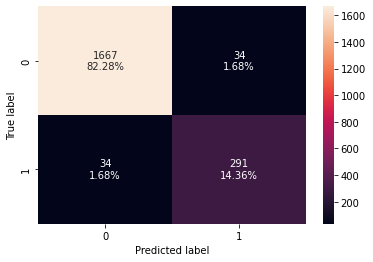

In [ ]:
# Lets Look at Confusion Matrix for test data with Adaboost Classifier
confusion_matrix_sklearn(abc, X_test, y_test)

**5. Gradient Boosting Classifier - BAU**



In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gb_train_perf = model_performance_classification_sklearn(
    gbc, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gb_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.969   0.865      0.940 0.901

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gb_test_perf = model_performance_classification_sklearn(
    gbc, X_test, y_test
)
print("Gradient Boosting classifier test performance:")
gb_test_perf

Gradient Boosting classifier test performance:


Accuracy  Recall  Precision    F1
0     0.971   0.883      0.935 0.908

Before calling Predict
After calling Predict


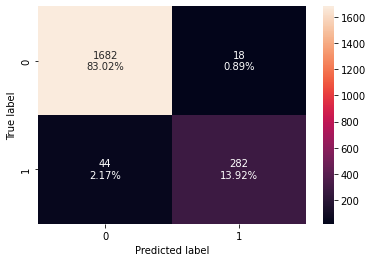

In [ ]:
# Lets Look at Confusion Matrix for validation data with Gradientboost Classifier
confusion_matrix_sklearn(gbc, X_val, y_val)

Before calling Predict
After calling Predict


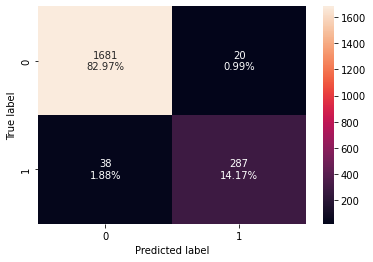

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradientboost Classifier
confusion_matrix_sklearn(gbc, X_test, y_test)

**6. Extreme Gradient Boosting Classifier - BAU**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Calculating different metrics on validation set with ada boost 
xgb_train_perf = model_performance_classification_sklearn(
    xgb, X_val, y_val
)
print("extreme gradient boosting classifier validation performance:")
xgb_train_perf

extreme gradient boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.965   0.844      0.935 0.887

In [ ]:
# Calculating different metrics on validation set with gradient boost 
xgb_test_perf = model_performance_classification_sklearn(
    xgb, X_test, y_test
)
print("extreme gradient boosting classifier test performance:")
xgb_test_perf

extreme gradient boosting classifier test performance:


Accuracy  Recall  Precision    F1
0     0.969   0.874      0.931 0.902

Before calling Predict
After calling Predict


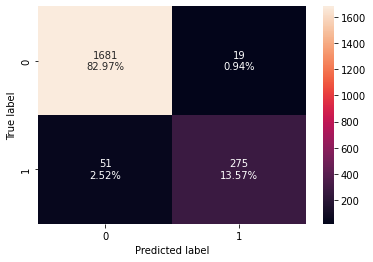

In [ ]:
# Lets Look at Confusion Matrix for validation data with Extreme Graident Classifier
confusion_matrix_sklearn(xgb, X_val, y_val)

Before calling Predict
After calling Predict


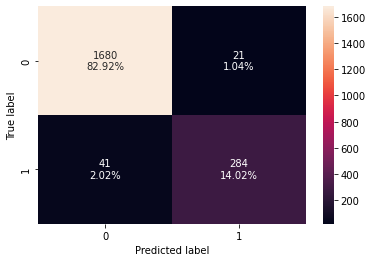

In [ ]:
# Lets Look at Confusion Matrix for test data with Adaboost Classifier
confusion_matrix_sklearn(xgb, X_test, y_test)

**Model Building with Oversampled Data**

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 28)
After UpSampling, the shape of train_y: (10198,) 



**Logistic Regression Model with Over Sampled Data**

In [ ]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

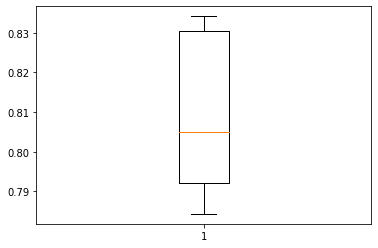

In [ ]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [ ]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.819   0.823      0.817 0.820

In [ ]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.816   0.810      0.460 0.587

Before calling Predict
After calling Predict


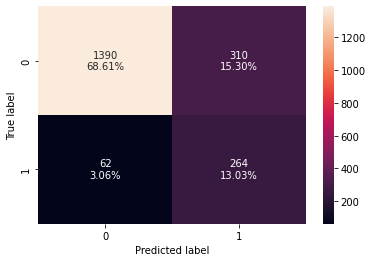

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

Before calling Predict
After calling Predict


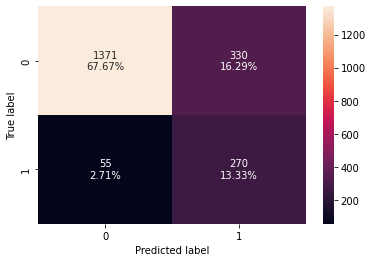

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_test, y_test)

**7. Decision Tree Classifier with Over Sampled Data**

In [ ]:
#Fitting the model
d_tree_o = DecisionTreeClassifier(random_state=1)
d_tree_o.fit(X_train_over,y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Calculating different metrics on validation set
dec_tree_o_train_perf = model_performance_classification_sklearn(
    d_tree_o, X_val, y_val
)
print("validation performance:")
dec_tree_o_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.913   0.785      0.707 0.744

In [ ]:
# Calculating different metrics on validation set
dec_tree_o_test_perf = model_performance_classification_sklearn(
    d_tree_o, X_test, y_test
)
print("Testing performance:")
dec_tree_o_test_perf

Testing performance:


Accuracy  Recall  Precision    F1
0     0.904   0.788      0.670 0.724

Before calling Predict
After calling Predict


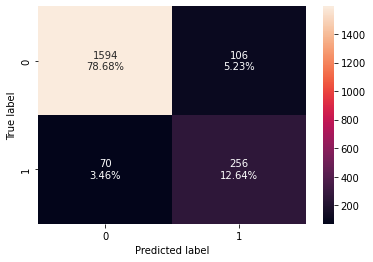

In [ ]:
# Lets Look at Confusion Matrix for validation with Decision Tree Classifier trained with oversampled data
confusion_matrix_sklearn(d_tree_o, X_val, y_val)

Before calling Predict
After calling Predict


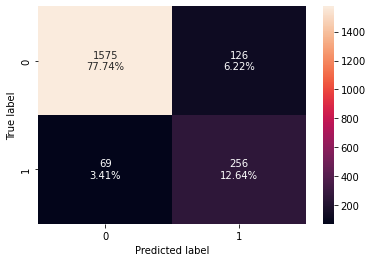

In [ ]:
# Lets Look at Confusion Matrix for test data with Decision Tree Classifier trained with oversampled data
confusion_matrix_sklearn(d_tree_o, X_test, y_test)

**8. RandomForest Classifier with Over-SampledData**

In [ ]:
#Fitting the model
rfo_estimator = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=100)
rfo_estimator.fit(X_train_over,y_train_over)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Calculating different metrics on validation set
rf_o_train_perf = model_performance_classification_sklearn(
    rfo_estimator, X_val, y_val
)
print("validation performance:")
rf_o_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.785      0.862 0.822

In [ ]:
# Calculating different metrics on validation set
rf_o_test_perf = model_performance_classification_sklearn(
    rfo_estimator, X_test, y_test
)
print("validation performance:")
rf_o_test_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.951   0.812      0.874 0.842

Before calling Predict
After calling Predict


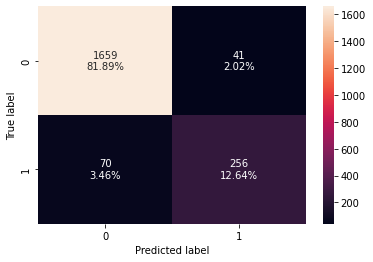

In [ ]:
# Lets Look at Confusion Matrix for validation with Random Forest classifier trained with oversampled data
confusion_matrix_sklearn(rfo_estimator, X_val, y_val)

Before calling Predict
After calling Predict


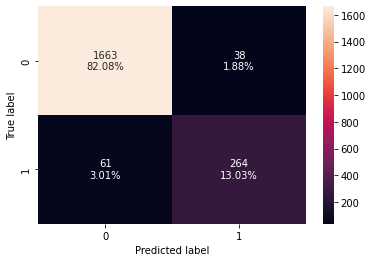

In [ ]:
# Lets Look at Confusion Matrix for test data with Random Forest classifier trained with oversampled data
confusion_matrix_sklearn(rfo_estimator, X_test, y_test)

**9. Bagging Classifier with Over-Sampled Data**



In [ ]:
seed = 1
dTreeclass = DecisionTreeClassifier()
num_trees = 100

bagging_o_classifier = BaggingClassifier(base_estimator=dTreeclass,n_estimators=num_trees, random_state=seed)
bagging_o_classifier.fit(X_train_over,y_train_over)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
# Calculating different metrics on validation set
bag_o_class_train_perf = model_performance_classification_sklearn(
    bagging_o_classifier, X_val, y_val
)
print("validation performance:")
bag_o_class_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.952   0.853      0.850 0.851

In [ ]:
# Calculating different metrics on validation set
bag_o_class_test_perf = model_performance_classification_sklearn(
    bagging_o_classifier, X_test, y_test
)
print("validation performance:")
bag_o_class_test_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.955   0.886      0.842 0.864

Before calling Predict
After calling Predict


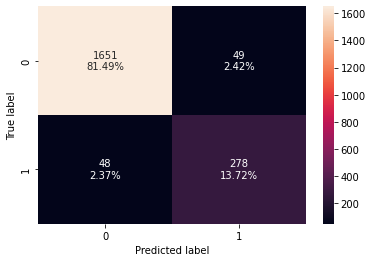

In [ ]:
# Lets Look at Confusion Matrix for validation with Bagging classifier trained with oversampled data
confusion_matrix_sklearn(bagging_o_classifier, X_val, y_val)

Before calling Predict
After calling Predict


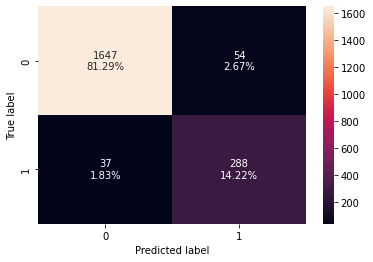

In [ ]:
# Lets Look at Confusion Matrix for test data with Bagging classifier trained with oversampled data
confusion_matrix_sklearn(bagging_o_classifier, X_test, y_test)

**10. Adaboost Classifier with Over-Sampled Data**



In [ ]:
abc_o = AdaBoostClassifier(random_state=1)
abc_o.fit(X_train_over,y_train_over)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
# Calculating different metrics on validation set with ada boost 
abo_train_perf = model_performance_classification_sklearn(
    abc_o, X_val, y_val
)
print("Adaboost classifier validation performance:")
abo_train_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.937   0.850      0.778 0.812

In [ ]:
# Calculating different metrics on validation set with ada boost 
abo_test_perf = model_performance_classification_sklearn(
    abc_o, X_test, y_test
)
print("bagging classifier test performance:")
abo_test_perf

bagging classifier test performance:


Accuracy  Recall  Precision    F1
0     0.943   0.877      0.792 0.832

Before calling Predict
After calling Predict


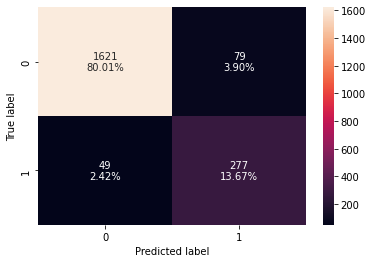

In [ ]:
# Lets Look at Confusion Matrix for validation with Adaboost classifier trained with oversampled data
confusion_matrix_sklearn(abc_o, X_val, y_val)

Before calling Predict
After calling Predict


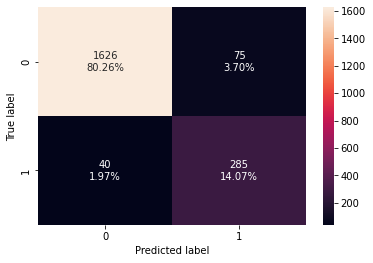

In [ ]:
# Lets Look at Confusion Matrix for test data with Adaboost classifier trained with oversampled data
confusion_matrix_sklearn(abc_o, X_test, y_test)

**11. Gradient Boosting Classifier - Over-Sampled Data**

In [ ]:
gbc_o = GradientBoostingClassifier(random_state=1)
gbc_o.fit(X_train_over,y_train_over)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gbo_train_perf = model_performance_classification_sklearn(
    gbc_o, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gbo_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.958   0.862      0.875 0.869

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gbo_test_perf = model_performance_classification_sklearn(
    gbc_o, X_test, y_test
)
print("Gradient Boosting classifier test performance:")
gbo_test_perf

Gradient Boosting classifier test performance:


Accuracy  Recall  Precision    F1
0     0.964   0.905      0.878 0.891

Before calling Predict
After calling Predict


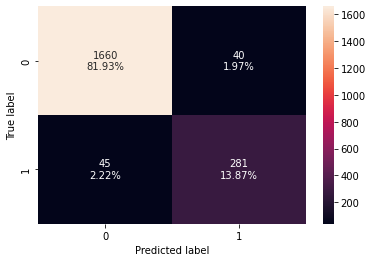

In [ ]:
# Lets Look at Confusion Matrix for validation with Gradientboosting classifier trained with oversampled data
confusion_matrix_sklearn(gbc_o, X_val, y_val)

Before calling Predict
After calling Predict


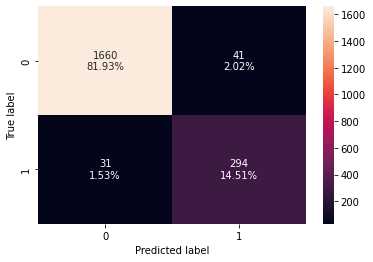

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradientboosting classifier trained with oversampled data
confusion_matrix_sklearn(gbc_o, X_test, y_test)

**12. Extreme Gradient Boosting Classifer - Over-Sampled Data**

In [ ]:
GB_X = pd.DataFrame(data=X_train_over,columns=X_train.columns)

xgbo = XGBClassifier(random_state=1,eval_metric='logloss')
xgbo.fit(GB_X,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xgbo_train_perf = model_performance_classification_sklearn(
    xgbo, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
xgbo_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.959   0.874      0.869 0.872

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xgbo_test_perf = model_performance_classification_sklearn(
    xgbo, X_test, y_test
)
print("Gradient Boosting classifier validation performance:")
xgbo_test_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.965   0.911      0.878 0.894

Before calling Predict
After calling Predict


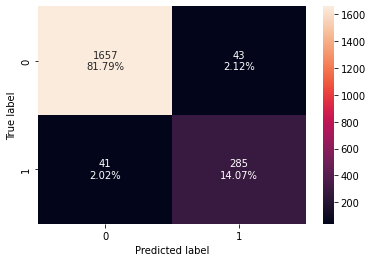

In [ ]:
# Lets Look at Confusion Matrix for validation with Extreme Gradientboosing classifier trained with oversampled data
confusion_matrix_sklearn(xgbo, X_val, y_val)

Before calling Predict
After calling Predict


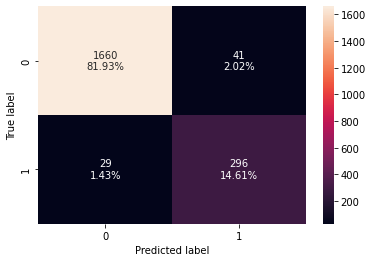

In [ ]:
# Lets Look at Confusion Matrix for test data with Extreme Gradientboosing classifier trained with oversampled data
confusion_matrix_sklearn(xgbo, X_test, y_test)

**Under Sampling**

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 28)
After Under Sampling, the shape of train_y: (1952,) 



**13. Decision Tree Classifier with Under-SampledData**

In [ ]:
#Fitting the model
d_tree_u = DecisionTreeClassifier(random_state=1)
d_tree_u.fit(X_train_un,y_train_un)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Calculating different metrics on validation set
dec_tree_u_train_perf = model_performance_classification_sklearn(
    d_tree_u, X_val, y_val
)
print("validation performance:")
dec_tree_u_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.888   0.902      0.601 0.721

In [ ]:
# Calculating different metrics on validation set
dec_tree_u_test_perf = model_performance_classification_sklearn(
    d_tree_u, X_test, y_test
)
print("Testing performance:")
dec_tree_u_test_perf

Testing performance:


Accuracy  Recall  Precision    F1
0     0.888   0.929      0.597 0.727

Before calling Predict
After calling Predict


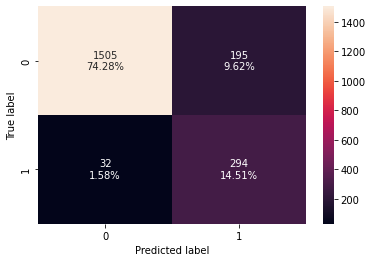

In [ ]:
# Lets Look at Confusion Matrix for validation with Decision Tree trained with under sampled data
confusion_matrix_sklearn(d_tree_u, X_val, y_val)

Before calling Predict
After calling Predict


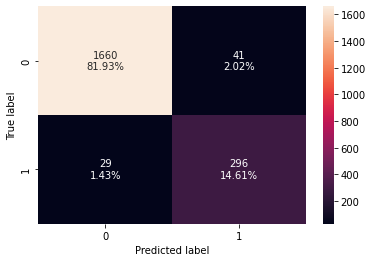

In [ ]:
# Lets Look at Confusion Matrix for test data with Decision Tree trained with under sampled data
confusion_matrix_sklearn(xgbo, X_test, y_test)

**14. RandomForest Classifier built with Under-SampledData**

In [ ]:
#Fitting the model
rfu_estimator = RandomForestClassifier(random_state=1,criterion='gini',n_estimators=100)
rfu_estimator.fit(X_train_un,y_train_un)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Calculating different metrics on validation set
rf_u_train_perf = model_performance_classification_sklearn(
    rfu_estimator, X_val, y_val
)
print("validation performance:")
rf_u_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.934   0.936      0.730 0.820

In [ ]:
# Calculating different metrics on validation set
rf_u_test_perf = model_performance_classification_sklearn(
    rfu_estimator, X_test, y_test
)
print("validation performance:")
rf_u_test_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.930   0.960      0.707 0.815

Before calling Predict
After calling Predict


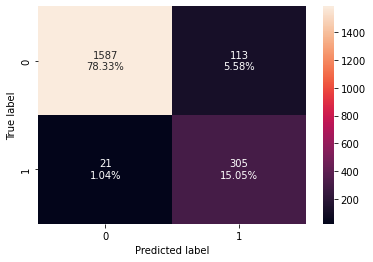

In [ ]:
# Lets Look at Confusion Matrix for validation with Random Forest trained with under sampled data
confusion_matrix_sklearn(rfu_estimator, X_val, y_val)

Before calling Predict
After calling Predict


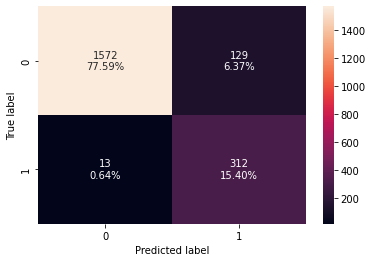

In [ ]:
# Lets Look at Confusion Matrix for test data with Random Forest trained with under sampled data
confusion_matrix_sklearn(rfu_estimator, X_test, y_test)

**15. Bagging Classifier trained with Under-Sampled Data**



In [ ]:
seed = 1
dTreeclass = DecisionTreeClassifier()
num_trees = 100

bagging_u_classifier = BaggingClassifier(base_estimator=dTreeclass,n_estimators=num_trees, random_state=seed)
bagging_u_classifier.fit(X_train_over,y_train_over)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
# Calculating different metrics on validation set
bag_u_class_train_perf = model_performance_classification_sklearn(
    bagging_u_classifier, X_val, y_val
)
print("validation performance:")
bag_u_class_train_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.952   0.853      0.850 0.851

In [ ]:
# Calculating different metrics on validation set
bag_u_class_test_perf = model_performance_classification_sklearn(
    bagging_u_classifier, X_test, y_test
)
print("validation performance:")
bag_u_class_test_perf

validation performance:


Accuracy  Recall  Precision    F1
0     0.955   0.886      0.842 0.864

Before calling Predict
After calling Predict


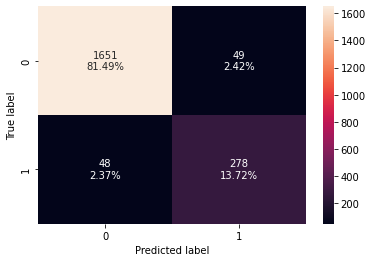

In [ ]:
# Lets Look at Confusion Matrix for validation with Bagging Classifier trained with under sampled data
confusion_matrix_sklearn(bagging_u_classifier, X_val, y_val)

Before calling Predict
After calling Predict


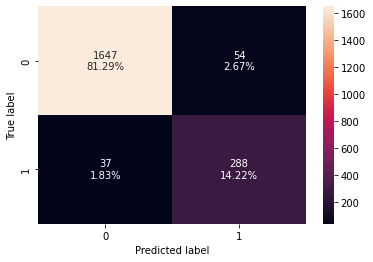

In [ ]:
# Lets Look at Confusion Matrix for test data with Bagging Classifier trained with under sampled data
confusion_matrix_sklearn(bagging_u_classifier, X_test, y_test)

**16. Adaboost Classifier trained with Under-Sampled Data**



In [ ]:
abc_u = AdaBoostClassifier(random_state=1)
abc_u.fit(X_train_un,y_train_un)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
# Calculating different metrics on validation set with ada boost 
abu_train_perf = model_performance_classification_sklearn(
    abc_u, X_val, y_val
)
print("Adaboost classifier validation performance:")
abu_train_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.932   0.969      0.712 0.821

In [ ]:
# Calculating different metrics on validation set with ada boost 
abu_test_perf = model_performance_classification_sklearn(
    abc_u, X_test, y_test
)
print("bagging classifier test performance:")
abu_test_perf

bagging classifier test performance:


Accuracy  Recall  Precision    F1
0     0.930   0.957      0.710 0.815

Before calling Predict
After calling Predict


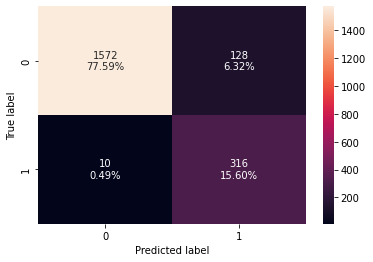

In [ ]:
# Lets Look at Confusion Matrix for validation with Adaboost classifier trained with under sampled data
confusion_matrix_sklearn(abc_u, X_val, y_val)

Before calling Predict
After calling Predict


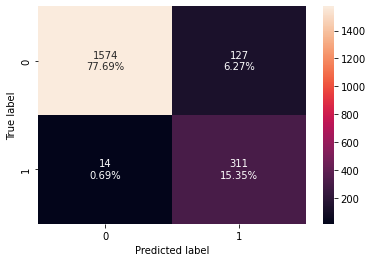

In [ ]:
# Lets Look at Confusion Matrix for test data with Adaboost classifier trained with under sampled data
confusion_matrix_sklearn(abc_u, X_test, y_test)

**17. Gradient Boosting Classifier trained with Under-Sampled Data**

In [ ]:
gbc_u = GradientBoostingClassifier(random_state=1)
gbc_u.fit(X_train_un,y_train_un)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gbu_train_perf = model_performance_classification_sklearn(
    gbc_u, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gbu_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.939   0.960      0.740 0.836

In [ ]:
# Calculating different metrics on validation set with gradient boost 
gbu_test_perf = model_performance_classification_sklearn(
    gbc_u, X_test, y_test
)
print("Gradient Boosting classifier test performance:")
gbo_test_perf

Gradient Boosting classifier test performance:


Accuracy  Recall  Precision    F1
0     0.964   0.905      0.878 0.891

Before calling Predict
After calling Predict


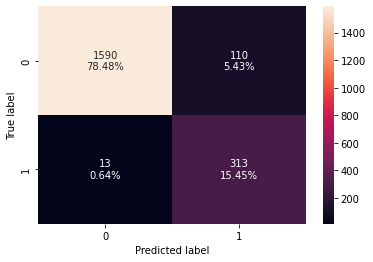

In [ ]:
# Lets Look at Confusion Matrix for validation with Gradient Boost trained with under sampled data
confusion_matrix_sklearn(gbc_u, X_val, y_val)

Before calling Predict
After calling Predict


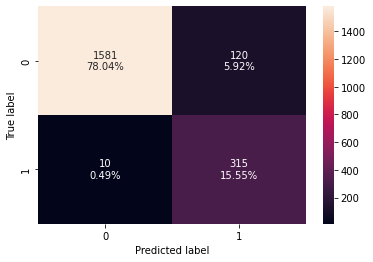

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradient Boost trained with under sampled data
confusion_matrix_sklearn(gbc_u, X_test, y_test)

**18. Extreme Gradient Boosting Classifer trained with - Under-Sampled Data**

In [ ]:
GBU_X = pd.DataFrame(data=X_train_un,columns=X_train.columns)

xgbu = XGBClassifier(random_state=1,eval_metric='logloss')
xgbu.fit(GBU_X,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xgbu_train_perf = model_performance_classification_sklearn(
    xgbu, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
xgbu_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.938   0.963      0.734 0.833

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xgbu_test_perf = model_performance_classification_sklearn(
    xgbu, X_test, y_test
)
print("Gradient Boosting classifier validation performance:")
xgbu_test_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.932   0.966      0.714 0.821

Before calling Predict
After calling Predict


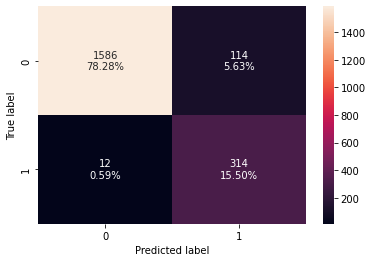

In [ ]:
# Lets Look at Confusion Matrix for validation with Extreme Gradient Boosting classifier trained with under sampled data
confusion_matrix_sklearn(xgbu, X_val, y_val)

Before calling Predict
After calling Predict


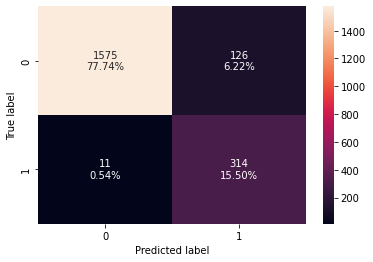

In [ ]:
# Lets Look at Confusion Matrix for test data with Extreme Gradient Bossting classifier trained with under sampled data
confusion_matrix_sklearn(xgbu, X_test, y_test)

**Comparision Study of All Models**

Lets First Look at Training Performance


In [ ]:
results_df = pd.concat([dec_tree_train_perf,rf_train_perf,bg_train_perf,ab_train_perf,gb_train_perf,xgb_test_perf,
dec_tree_o_train_perf,rf_o_train_perf,bag_o_class_train_perf,abo_train_perf,gbo_train_perf,xgbo_test_perf,
dec_tree_u_train_perf,rf_u_train_perf,bag_u_class_train_perf,abu_train_perf,gbu_train_perf,xgbu_test_perf],
keys=['DecisionTree','RandomForest','Bagging','AdaBoost','GradientBoost','ExtremeGradientBoost','DecisionTree_Over','RandomForest_Over','Bagging_Over','AdaBoost_Over','GradientBoost_Over','ExtremeGradientBoost_Over','DecisionTree_Under','RandomForest_Under','Bagging_Under','AdaBoost_Under','GradientBoost_Under','ExtremeGradientBoost_Under'])

In [ ]:
results_df

Accuracy  Recall  Precision    F1
DecisionTree               0     0.938   0.810      0.805 0.807
RandomForest               0     0.958   0.791      0.935 0.857
Bagging                    0     0.964   0.865      0.907 0.885
AdaBoost                   0     0.962   0.862      0.901 0.881
GradientBoost              0     0.969   0.865      0.940 0.901
ExtremeGradientBoost       0     0.969   0.874      0.931 0.902
DecisionTree_Over          0     0.913   0.785      0.707 0.744
RandomForest_Over          0     0.945   0.785      0.862 0.822
Bagging_Over               0     0.952   0.853      0.850 0.851
AdaBoost_Over              0     0.937   0.850      0.778 0.812
GradientBoost_Over         0     0.958   0.862      0.875 0.869
ExtremeGradientBoost_Over  0     0.965   0.911      0.878 0.894
DecisionTree_Under         0     0.888   0.902      0.601 0.721
RandomForest_Under         0     0.934   0.936      0.730 0.820
Bagging_Under              0     0.952   0.853      0.850 0.851
AdaBoost_Under             0     0.932   0.969      0.712 0.821
GradientBoost_Under        0     0.939   0.960      0.740 0.836
ExtremeGradientBoost_Under 0     0.932   0.966      0.714 0.821

Lets now look at the Test Performance


In [ ]:
results_test_df = pd.concat([dec_tree_test_perf,rf_test_perf,bg_test_perf,ab_test_perf,gb_test_perf,xgb_test_perf,
dec_tree_o_test_perf,rf_o_test_perf,bag_o_class_test_perf,abo_test_perf,gbo_test_perf,xgbo_test_perf,
dec_tree_u_test_perf,rf_u_test_perf,bag_u_class_test_perf,abu_test_perf,gbu_test_perf,xgbu_test_perf],
keys=['DecisionTree','RandomForest','Bagging','AdaBoost','GradientBoost','ExtremeGradientBoost','DecisionTree_Over','RandomForest_Over','Bagging_Over','AdaBoost_Over','GradientBoost_Over','ExtremeGradientBoost_Over','DecisionTree_Under','RandomForest_Under','Bagging_Under','AdaBoost_Under','GradientBoost_Under','ExtremeGradientBoost_Under'])

In [ ]:
results_test_df

Accuracy  Recall  Precision    F1
DecisionTree               0     0.932   0.831      0.767 0.798
RandomForest               0     0.960   0.815      0.923 0.866
Bagging                    0     0.962   0.895      0.874 0.884
AdaBoost                   0     0.966   0.895      0.895 0.895
GradientBoost              0     0.971   0.883      0.935 0.908
ExtremeGradientBoost       0     0.969   0.874      0.931 0.902
DecisionTree_Over          0     0.904   0.788      0.670 0.724
RandomForest_Over          0     0.951   0.812      0.874 0.842
Bagging_Over               0     0.955   0.886      0.842 0.864
AdaBoost_Over              0     0.943   0.877      0.792 0.832
GradientBoost_Over         0     0.964   0.905      0.878 0.891
ExtremeGradientBoost_Over  0     0.965   0.911      0.878 0.894
DecisionTree_Under         0     0.888   0.929      0.597 0.727
RandomForest_Under         0     0.930   0.960      0.707 0.815
Bagging_Under              0     0.955   0.886      0.842 0.864
AdaBoost_Under             0     0.930   0.957      0.710 0.815
GradientBoost_Under        0     0.936   0.969      0.724 0.829
ExtremeGradientBoost_Under 0     0.932   0.966      0.714 0.821

**19. Gradient Boosting Classifier - Tuned with Grid Search and Undersampled Data** 



In [ ]:
# Choose the type of classifier. 
gbc_tuned_v1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(100,500,100),
    "subsample":np.arange(0.7,1,.1),
    "max_features":np.arange(0.7,1,.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Lets introduce cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned_v1, parameters, scoring=acc_scorer,cv=cv,n_jobs=-1,verbose=-2)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned_v1_b = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_v1_b.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 757 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 85.2min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9999999999999999, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.7999999999999999,
                           tol=0.0001, validation_fraction

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbct_v1_train_perf = model_performance_classification_sklearn(
    gbc_tuned_v1_b, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gbct_v1_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.976   0.902      0.948 0.925

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbct_v1_test_perf = model_performance_classification_sklearn(
    gbc_tuned_v1_b, X_test, y_test
)
print("Gradient Boosting classifier validation performance:")
gbct_v1_test_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.980   0.923      0.949 0.936

Before calling Predict
After calling Predict


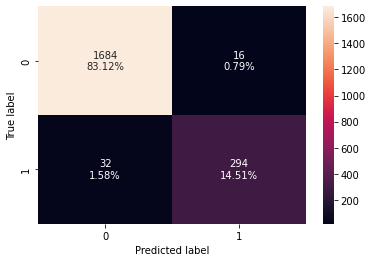

In [ ]:
# Lets Look at Confusion Matrix for validation with Gradient Boosting classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v1_b, X_val, y_val)

Before calling Predict
After calling Predict


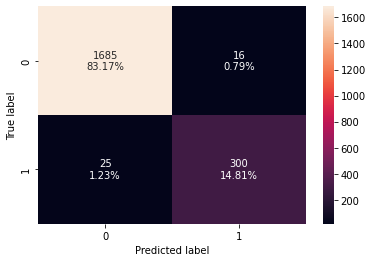

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradient Boosting classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v1_b, X_test, y_test)

**20. GradientBoost Boosting Classifier Tuned with Grid Search and Over Sampled Data**


In [ ]:
# Choose the type of classifier. 
gbc_tuned_v2 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(100,500,100),
    "subsample":np.arange(0.7,1,.1),
    "max_features":np.arange(0.7,1,.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned_v2, parameters, scoring=acc_scorer,cv=cv,n_jobs=-1,verbose=-2)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned_v2_b = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_v2_b.fit(X_train_over, y_train_over)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 757 tasks      | elapsed: 62.2min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed: 126.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 198.6min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.9999999999999999, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.7999999999999999,
                           tol=0.0001, validation_fraction

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbct_v2_train_perf = model_performance_classification_sklearn(
    gbc_tuned_v2_b, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gbct_v2_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.972   0.902      0.925 0.913

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbct_v2_test_perf = model_performance_classification_sklearn(
    gbc_tuned_v2_b, X_test, y_test
)
print("Gradient Boosting classifier validation performance:")
gbct_v2_test_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.979   0.938      0.933 0.936

Before calling Predict
After calling Predict


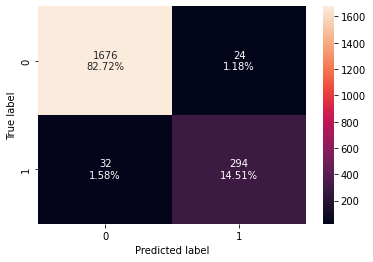

In [ ]:
# Lets Look at Confusion Matrix for validation with Gradient Boosting classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v2_b, X_val, y_val)

Before calling Predict
After calling Predict


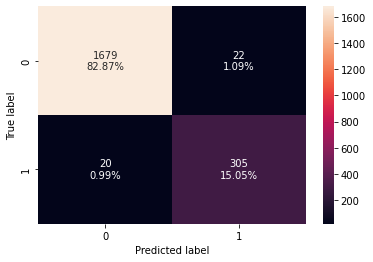

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradient Boosting classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v2_b, X_test, y_test)

**21. Ada Boosting Classifier Tuned with Random Search and Undersampled Data**

In [ ]:
#AdaBoost_Under sampling, GradientBoost_Under sampling
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
abct_v2_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_val, y_val
)
print("Adaboost classifier validation performance:")
abct_v2_train_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.938   0.966      0.734 0.834

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
abct_v2_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Adaboost classifier validation performance:")
abct_v2_test_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.966      0.724 0.827

Before calling Predict
After calling Predict


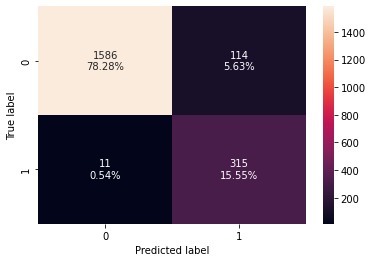

In [ ]:
# Lets Look at Confusion Matrix for validation with Ada Boost classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(abc_tuned, X_val, y_val)

Before calling Predict
After calling Predict


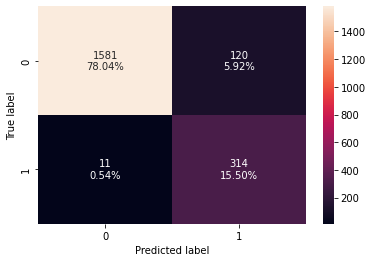

In [ ]:
# Lets Look at Confusion Matrix for test data with Ada Boost classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

**22. Gradient Boosting Classifier - Tuned with Grid Search and Undersampled Data**

In [ ]:
# Choose the type of classifier. 
gbc_tuned_v3 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(100,500,100),
    "subsample":np.arange(0.7,1,.1),
    "max_features":np.arange(0.7,1,.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned_v3, parameters, scoring=acc_scorer,cv=cv,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
gbc_tuned_v3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_v3.fit(X_train_un, y_train_un)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7999999999999999, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8999999999999999,
                           tol=0.0001, validation_fraction

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbc_v3_train_perf = model_performance_classification_sklearn(
    gbc_tuned_v3, X_val, y_val
)
print("Gradient Boosting classifier validation performance:")
gbc_v3_train_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.952   0.975      0.779 0.866

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbc_v3_test_perf = model_performance_classification_sklearn(
    gbc_tuned_v3, X_test, y_test
)


In [ ]:
print("Gradient Boosting classifier validation performance:")
gbc_v3_test_perf

Gradient Boosting classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.951   0.966      0.779 0.863

Before calling Predict
After calling Predict


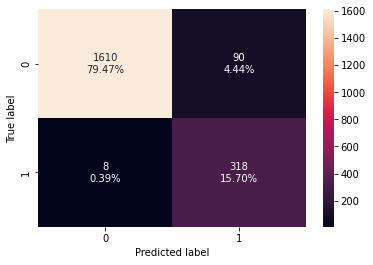

In [ ]:
# Lets Look at Confusion Matrix for validation with Gradient Boost classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v3, X_val, y_val)

Before calling Predict
After calling Predict


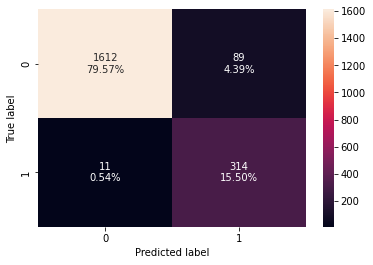

In [ ]:
# Lets Look at Confusion Matrix for test data with Gradient Boost classifier trained with Grid Search and under sampled data
confusion_matrix_sklearn(gbc_tuned_v3, X_test, y_test)

**Results of Model Tuning on Validation Data**

In [ ]:
results_train_df = pd.concat([gbct_v1_train_perf,gbct_v2_train_perf,abct_v2_train_perf,gbc_v3_train_perf],
keys=['Tuned Gradient Boost','Tuned Gradient Boost - Oversampling','Tuned AdaBoost - UnderSampling','GradientBoost','Tuned Gradient Boost - Undersampling'])
results_train_df

Accuracy  Recall  Precision    F1
Tuned Gradient Boost                0     0.976   0.902      0.948 0.925
Tuned Gradient Boost - Oversampling 0     0.972   0.902      0.925 0.913
Tuned AdaBoost - UnderSampling      0     0.938   0.966      0.734 0.834
GradientBoost                       0     0.952   0.975      0.779 0.866

**Results of Model Tuning on Test Data**

In [ ]:
results_test_df = pd.concat([gbct_v1_test_perf,gbct_v2_test_perf,abct_v2_test_perf,gbc_v3_test_perf],
keys=['Tuned Gradient Boost','Tuned Gradient Boost - Oversampling','Tuned AdaBoost - UnderSampling','GradientBoost','Tuned Gradient Boost - Undersampling'])
results_test_df

Accuracy  Recall  Precision    F1
Tuned Gradient Boost                0     0.980   0.923      0.949 0.936
Tuned Gradient Boost - Oversampling 0     0.979   0.938      0.933 0.936
Tuned AdaBoost - UnderSampling      0     0.935   0.966      0.724 0.827
GradientBoost                       0     0.951   0.966      0.779 0.863

**Model Selection & Tuning Criteria**

We are looking at stopping the Churn in Credit Card users, and any campaign that "The Thera bank" should be doing is identifying the customers who will attrite accurately and also minimising the number of False Negatives, so that the Bank is not making the mistake of leaving out folks, just because the model says that they will not attrite, but they really attrite.So, Re-call is a Key Metric here. And our Model tuning will have to focus on Recall as a Metric

From above data and from Confusion Matrix, we see that the Gradient Boosting Regressor with Undersampled Data is producing 

The ExtremeGradientBoosting is a time consuming model to operate upon, and is not looked at for doing a Grid Search. We will attempt the same in RandomSearch

**Hyper Parameter Tuning with RandomizedSearchCV**

**Ada Boost Model Tuned with Random Search and Under Sampling**

In [ ]:
df_train_un = pd.DataFrame(data=X_train_un,columns=X_train.columns)

In [ ]:
#AdaBoost_Under sampling, GradientBoost_Under sampling
# Choose the type of classifier. 
abcr_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,200,10),
    "learning_rate":np.arange(0.1,2,0.05)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
rs_obj = RandomizedSearchCV(abcr_tuned, parameters, scoring=acc_scorer,cv=cv,n_jobs=-1,verbose=2)
rs_obj = rs_obj.fit(df_train_un, y_train_un)

# Set the clf to the best combination of parameters
abcr_b_tuned = rs_obj.best_estimator_

# Fit the best algorithm to the data.
abcr_b_tuned.fit(df_train_un, y_train_un)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
abcrs_v2_train_perf = model_performance_classification_sklearn(
    abcr_b_tuned, X_val, y_val
)
print("Adaboost classifier validation performance:")
abcrs_v2_train_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.979      0.754 0.852

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
abcrs_v2_test_perf = model_performance_classification_sklearn(
    abcr_b_tuned, X_test, y_test
)
print("Adaboost classifier validation performance:")
abcrs_v2_test_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.940   0.966      0.741 0.838

Before calling Predict
After calling Predict


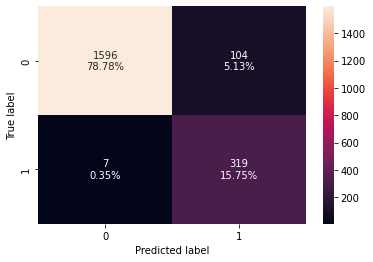

In [ ]:
# Lets Look at Confusion Matrix for validation with Ada Boost classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(abcr_b_tuned, X_val, y_val)

Before calling Predict
After calling Predict


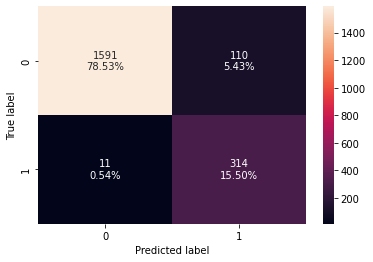

In [ ]:
# Lets Look at Confusion Matrix for test data with Ada Boost classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(abcr_b_tuned, X_test, y_test)

**Gradient Boosting Classifier Tuned with Random Search CV and Under Sampled Data**

In [ ]:
# Choose the type of classifier. 
gbc_rs_tuned_v1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(10,200,10),
    "subsample":np.arange(0.5,1,.1),
    "max_features":np.arange(0.5,1,.1),
    "max_depth":np.arange(3,10,1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
rsgb_obj = RandomizedSearchCV(gbc_rs_tuned_v1, parameters, scoring=acc_scorer,cv=cv,n_jobs=-1,verbose=2)
rsgb_obj = rsgb_obj.fit(df_train_un, y_train_un)

# Set the clf to the best combination of parameters
gbc_b_rs_tuned_v1 = rsgb_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_b_rs_tuned_v1.fit(df_train_un, y_train_un)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=0.6, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbrs_v2_train_perf = model_performance_classification_sklearn(
    gbc_b_rs_tuned_v1, X_val, y_val
)
print("Gradient Boost classifier validation performance:")
gbrs_v2_train_perf

Gradient Boost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.940   0.960      0.742 0.837

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
gbrs_v2_test_perf = model_performance_classification_sklearn(
    gbc_b_rs_tuned_v1, X_test, y_test
)
print("Adaboost classifier validation performance:")
gbrs_v2_test_perf

Adaboost classifier validation performance:


Accuracy  Recall  Precision    F1
0     0.942   0.975      0.744 0.844

Before calling Predict
After calling Predict


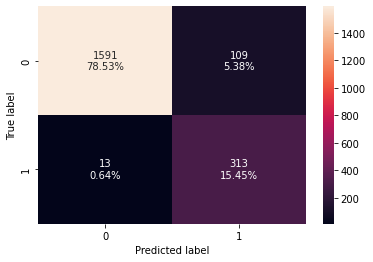

In [ ]:
# Lets Look at Confusion Matrix for validation with Random Forest classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(gbc_b_rs_tuned_v1, X_val, y_val)

Before calling Predict
After calling Predict


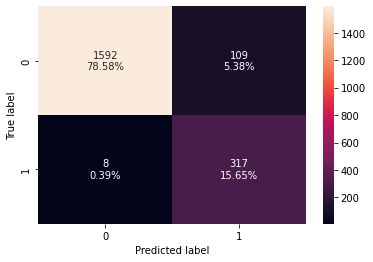

In [ ]:
# Lets Look at Confusion Matrix for test data with Random Forest classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(gbc_b_rs_tuned_v1, X_test, y_test)


**Extreme Gradient Boosting Classifier tuned with Under Sampled Data and Random Search CV text**




In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='mlogloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,200,10),    
    "min_child_weight":np.arange(0.1,1,0.01),
    "max_depth":np.arange(3,10,1),    
    "subsample":np.arange(0.5,1,0.01),
    "learning_rate":np.arange(0.01,1,0.01),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
xggrid_obj = RandomizedSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=cv,n_jobs=-1,verbose=2)
xggrid_obj = xggrid_obj.fit(df_train_un, y_train_un)

# Set the clf to the best combination of parameters
xgb_tuned = xggrid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(df_train_un, y_train_un)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.26, max_delta_step=0, max_depth=3,
              min_child_weight=0.2599999999999999, missing=None,
              n_estimators=190, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8900000000000003, verbosity=1)

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xg_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
print("Extreme Gradientboost validation performance:")
xg_train_perf

Extreme Gradientboost validation performance:


Accuracy  Recall  Precision    F1
0     0.946   0.969      0.761 0.853

In [ ]:
# Calculating different metrics on validation set with extreme gradient boost 
xg_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Extreme Gradientboost validation performance:")
xg_test_perf

Extreme Gradientboost validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.969      0.757 0.850

Before calling Predict
After calling Predict


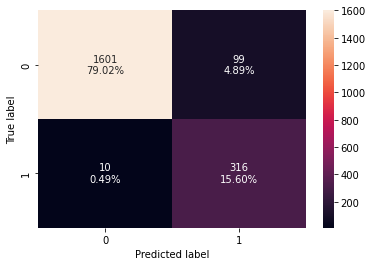

In [ ]:
# Lets Look at Confusion Matrix for validation with Extreme Gradient Boosting classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

Before calling Predict
After calling Predict


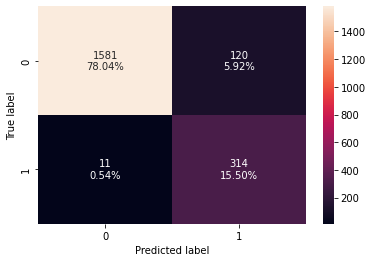

In [ ]:
# Lets Look at Confusion Matrix for test data with Extreme Gradient Boosting classifier trained with Random Search CV and under sampled data
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
results_tune_train_df = pd.concat([abcrs_v2_train_perf,gbrs_v2_train_perf,xg_train_perf],
keys=['Randomised Search AdaBoost - UnderSampling','Randomised Search Gradient Boost - Undersampling','Randomised Search Extreme-Gradient Boost - Undersampling'])
results_tune_train_df

Accuracy  Recall  \
Randomised Search AdaBoost - UnderSampling         0     0.945   0.979   
Randomised Search Gradient Boost - Undersampling   0     0.940   0.960   
Randomised Search Extreme-Gradient Boost - Unde... 0     0.946   0.969   

                                                      Precision    F1  
Randomised Search AdaBoost - UnderSampling         0      0.754 0.852  
Randomised Search Gradient Boost - Undersampling   0      0.742 0.837  
Randomised Search Extreme-Gradient Boost - Unde... 0      0.761 0.853

In [ ]:
results_tune_test_df = pd.concat([abcrs_v2_test_perf,gbrs_v2_test_perf,xg_test_perf],
keys=['Randomised Search AdaBoost - UnderSampling','Randomised Search Gradient Boost - Undersampling','Randomised Search Extreme-Gradient Boost - Undersampling'])
results_tune_test_df

Accuracy  Recall  \
Randomised Search AdaBoost - UnderSampling         0     0.940   0.966   
Randomised Search Gradient Boost - Undersampling   0     0.942   0.975   
Randomised Search Extreme-Gradient Boost - Unde... 0     0.945   0.969   

                                                      Precision    F1  
Randomised Search AdaBoost - UnderSampling         0      0.741 0.838  
Randomised Search Gradient Boost - Undersampling   0      0.744 0.844  
Randomised Search Extreme-Gradient Boost - Unde... 0      0.757 0.850

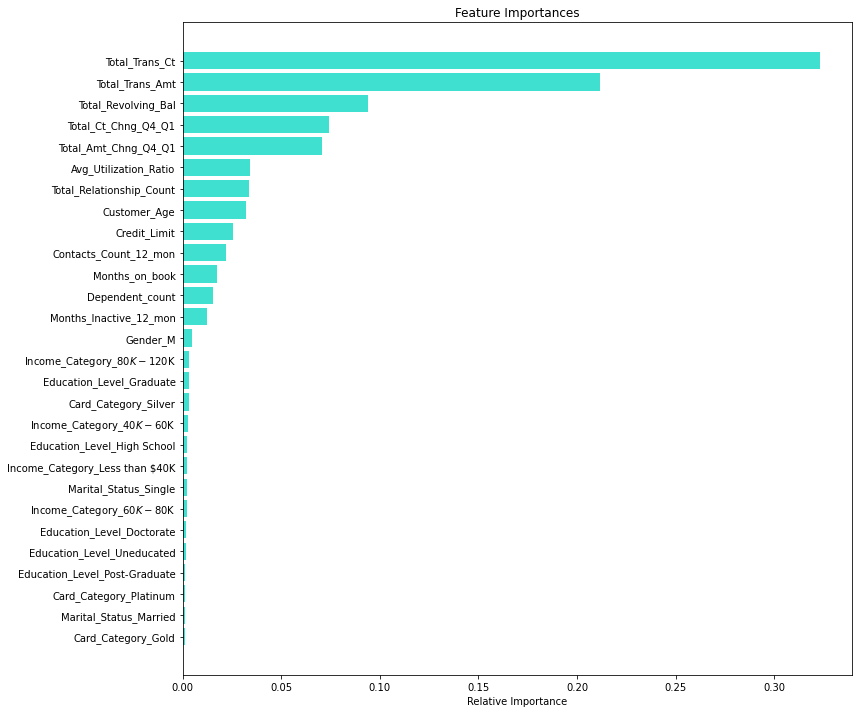

In [ ]:
# From the Outset of the 3 Models above, it is evident that Hyperparameter Tuning over Gradient Boosting Classifier, with Undersampled Data has turned the Best Recall(>0.95), Precision(>0.75) and Accuracy Scores
# Lets look at the Feature Importances with this Model
feature_names = df_train_un.columns
importances = gbc_b_rs_tuned_v1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="turquoise", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# To Build the Model Pipeline Let's use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   float64
 6   Marital_Status            9378 non-null   float64
 7   Income_Category           9015 non-null   float64
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
gender = {'M':0,'F':1}
data["Gender"] = data["Gender"].map(gender)

education = {'Graduate':0,'High School':1,'Uneducated':2,'College':3,'Post-Graduate':4,'Doctorate':5}
data["Education_Level"] = data["Education_Level"].map(education)

marital = {'Married':0,'Single':1,'Divorced':2}
data["Marital_Status"] = data["Marital_Status"].map(marital)

incCat = {'Less than $40K':0,'$40K - $60K':1,'$80K - $120K':2,'$60K - $80K':3,'$120K +':5}
data["Income_Category"] = data["Income_Category"].map(incCat)

ccat = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3}
data["Card_Category"] = data["Card_Category"].map(ccat)

In [ ]:
# creating a list of numerical variables
scalerCols = ['Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt']

# creating a transformer for numerical variables, which will apply quantile imputer on the numerical variables
scalar_transformation = Pipeline(steps=[("quantile_trans", QuantileTransformer())])

# Categorical Variables to be Imputed as part of missing values treatment
categorical_features = ["Education_Level","Income_Category","Marital_Status"]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("knn-imputer", KNNImputer(n_neighbors=4)),
        ("onehot", OneHotEncoder()),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scalar_transformation, scalerCols),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [ ]:
# Separating target variable and other variables
X = data.drop(columns=["CLIENTNUM","Attrition_Flag"],axis=1)
Y = data["Attrition_Flag"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBClassifier",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=150,   
                subsample=0.7,                 
                learning_rate=0.7,
                max_depth=8
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('quantile_trans',
                                                                   QuantileTransformer(copy=True,
                                                                                       ignore_implicit_zeros=False,
                                                                                       n_quantiles=1000,
                                                                                       output_distribution='uniform',
                                                                                       random_state=None,
      

In [ ]:
print(" Test score: {:.2f}". format( model.score( X_test, y_test)))

 Test score: 0.95


**Actionable Insights & Recommendations**

Based on Feature Importances and based on the bivariate analysis, we see that, Customers with the following characteristics have a high chance of attrition(have listed the 10 Top here)

1. Total_trans_Ct between 30-50, might attrite
2. Total_Trans_Amt between 1000 to 3000 on an average, has a fair chance of attrition
3. Total_Revolving_Amt between 0 to 1500 has a chance of attriting
4. Total_Ct_Chng_Q4_Q1 between 0.4 to 0.7 has a chance of attriting
5. Total_Amt_Chng_Q4_Q1 between 0.4 to 1 has a chance of attriting
6. Total Relationship Count less than 3 have a higher chance of attriting
7. Customer_Age between 40-60 have a higher chance of attriting along with the combination of above
8. Contacts_Count_12_mon between 2 to 4 have a higher chance of attriting
9. Months_Inactive_12_mon between 2 to 4
10. Credit_Limit under 10000 have a higher chance of attriting



In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/CreditCardUsersChurnPrediction.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CreditCardUsersChurnPrediction.ipynb to html
[NbConvertApp] Writing 2728254 bytes to /content/drive/MyDrive/Colab Notebooks/CreditCardUsersChurnPrediction.html
